In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

from univ_utility import corrplot, num_cols, cat_cols, target_distribution
%matplotlib inline

In [3]:
# Set Matplotlib defaults
plt.style.use("seaborn-whitegrid")
plt.rc("figure", autolayout=True, figsize=(11, 4))
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=16,
    titlepad=10,
)
plot_params = dict(
    color="0.75",
    style=".-",
    markeredgecolor="0.25",
    markerfacecolor="0.25",
)
%config InlineBackend.figure_format = 'retina'

In [4]:
u2011_df = pd.read_csv('2011_rankings.csv')
u2012_df = pd.read_csv('2012_rankings.csv')
u2013_df = pd.read_csv('2013_rankings.csv')
u2014_df = pd.read_csv('2014_rankings.csv')
u2015_df = pd.read_csv('2015_rankings.csv')
u2016_df = pd.read_csv('2016_rankings.csv')
u2017_df = pd.read_csv('2017_rankings.csv')
u2018_df = pd.read_csv('2018_rankings.csv')
u2019_df = pd.read_csv('2019_rankings.csv')
u2020_df = pd.read_csv('2020_rankings.csv')
u2021_df = pd.read_csv('2021_rankings.csv')
u2022_df = pd.read_csv('2022_rankings.csv')
u2023_df = pd.read_csv('2023_rankings.csv')

In [5]:
def add_year_column(dfs_dict):
    for year, df in dfs_dict.items():
        df['Year'] = year
    return dfs_dict

dfs_dict = {2011: u2011_df, 2012: u2012_df, 2013: u2013_df, 2014: u2014_df, 2015: u2015_df, 2016: u2016_df, 
           2017: u2017_df, 2018: u2018_df, 2019: u2019_df, 2020: u2020_df, 2021: u2021_df, 2022: u2022_df,
            2023: u2023_df}

dfs_dict_with_year = add_year_column(dfs_dict)


In [7]:
university_df = pd.concat([u2011_df,u2012_df,u2013_df,u2014_df,u2015_df,u2016_df,
                          u2017_df,u2018_df,u2019_df,u2020_df,u2021_df,u2022_df,u2023_df])

In [8]:
university_df.head()

rank_order rank                                   name scores_overall  \
0           1    1                     Harvard University           96.1   
1           2    2     California Institute of Technology           96.0   
2           3    3  Massachusetts Institute of Technology           95.6   
3           4    4                    Stanford University           94.3   
4           5    5                   Princeton University           94.2   

   scores_overall_rank  scores_teaching  scores_teaching_rank  \
0                    1             99.7                     1   
1                    2             97.7                     4   
2                    3             97.8                     3   
3                    4             98.3                     2   
4                    5             90.9                     6   

  scores_international_outlook  scores_international_outlook_rank  \
0                         72.4                                 49   
1                         54.6                                 93   
2                         82.3                                 36   
3                         29.5                                156   
4                         70.3                                 53   

  scores_industry_income  ...       location  \
0                   34.5  ...  United States   
1                   83.7  ...  United States   
2                   87.5  ...  United States   
3                   64.3  ...  United States   
4                      -  ...  United States   

                                      aliases  \
0                          Harvard University   
1  California Institute of Technology caltech   
2       Massachusetts Institute of Technology   
3                         Stanford University   
4                        Princeton University   

                                    subjects_offered  closed  unaccredited  \
0  Mathematics & Statistics,Civil Engineering,Lan...   False         False   
1  Languages, Literature & Linguistics,Economics ...   False         False   
2  Mathematics & Statistics,Languages, Literature...   False         False   
3  Physics & Astronomy,Computer Science,Politics ...   False         False   
4  Languages, Literature & Linguistics,Biological...   False         False   

   Year stats_number_students stats_student_staff_ratio  \
0  2011                   NaN                       NaN   
1  2011                   NaN                       NaN   
2  2011                   NaN                       NaN   
3  2011                   NaN                       NaN   
4  2011                   NaN                       NaN   

   stats_pc_intl_students  stats_female_male_ratio  
0                     NaN                      NaN  
1                     NaN                      NaN  
2                     NaN                      NaN  
3                     NaN                      NaN  
4                     NaN                      NaN  

[5 rows x 25 columns]

In [8]:
# EXPLORATORY DATA ANALYSIS

In [9]:
university_df.shape

(13325, 25)

In [12]:
university_df.describe()

rank_order  scores_overall_rank  scores_teaching  \
count  1.332500e+04         1.332500e+04     12329.000000   
mean   8.008573e+04         8.008690e+04        30.214081   
std    2.615863e+05         2.615859e+05        15.321563   
min    1.000000e+00         1.000000e+00         8.200000   
25%    1.050000e+03         1.050000e+03        19.200000   
50%    5.800000e+03         5.800000e+03        25.400000   
75%    1.069000e+04         1.069000e+04        36.400000   
max    1.000544e+06         1.000544e+06        99.700000   

       scores_teaching_rank  scores_international_outlook_rank  \
count          13325.000000                       13325.000000   
mean             576.930507                         576.930507   
std              460.183347                         460.183347   
min                0.000000                           0.000000   
25%              180.000000                         180.000000   
50%              483.000000                         483.000000   
75%              914.000000                         914.000000   
max             1799.000000                        1799.000000   

       scores_industry_income_rank  scores_research  scores_research_rank  \
count                 13325.000000     12329.000000          13325.000000   
mean                    576.930507        26.446387            576.930507   
std                     460.183347        19.043454            460.183347   
min                       0.000000         0.800000              0.000000   
25%                     180.000000        12.300000            180.000000   
50%                     483.000000        20.200000            483.000000   
75%                     914.000000        34.100000            914.000000   
max                    1799.000000        99.700000           1799.000000   

       scores_citations  scores_citations_rank          Year  \
count      12329.000000           13325.000000  13325.000000   
mean          51.064717             576.930507   2019.321351   
std           27.498073             460.183347      3.220529   
min            0.700000               0.000000   2011.000000   
25%           26.400000             180.000000   2017.000000   
50%           50.900000             483.000000   2020.000000   
75%           74.400000             914.000000   2022.000000   
max          100.000000            1799.000000   2023.000000   

       stats_student_staff_ratio  
count               11521.000000  
mean                   18.939849  
std                    17.579755  
min                     0.300000  
25%                    12.300000  
50%                    16.400000  
75%                    22.100000  
max                   865.800000

In [13]:
university_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13325 entries, 0 to 2344
Data columns (total 25 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   rank_order                         13325 non-null  int64  
 1   rank                               13325 non-null  object 
 2   name                               13325 non-null  object 
 3   scores_overall                     12329 non-null  object 
 4   scores_overall_rank                13325 non-null  int64  
 5   scores_teaching                    12329 non-null  float64
 6   scores_teaching_rank               13325 non-null  int64  
 7   scores_international_outlook       12329 non-null  object 
 8   scores_international_outlook_rank  13325 non-null  int64  
 9   scores_industry_income             12329 non-null  object 
 10  scores_industry_income_rank        13325 non-null  int64  
 11  scores_research                    12329 non-null  floa

In [14]:
university_df.isnull().sum()

rank_order                              0
rank                                    0
name                                    0
scores_overall                        996
scores_overall_rank                     0
scores_teaching                       996
scores_teaching_rank                    0
scores_international_outlook          996
scores_international_outlook_rank       0
scores_industry_income                996
scores_industry_income_rank             0
scores_research                       996
scores_research_rank                    0
scores_citations                      996
scores_citations_rank                   0
location                                0
aliases                                 0
subjects_offered                       49
closed                                  0
unaccredited                            0
Year                                    0
stats_number_students                1803
stats_student_staff_ratio            1804
stats_pc_intl_students            

In [15]:
university_df['name'].value_counts()

Harvard University                                  13
University of Iowa                                  13
Lancaster University                                13
Leiden University                                   13
Ghent University                                    13
                                                    ..
Universidade Eduardo Mondlane                        1
University of Engineering and Technology, Taxila     1
ENSTA Bretagne                                       1
Graphic Era University                               1
Zarqa University                                     1
Name: name, Length: 2628, dtype: int64

In [16]:
num_cols(university_df)

['rank_order',
 'scores_overall_rank',
 'scores_teaching',
 'scores_teaching_rank',
 'scores_international_outlook_rank',
 'scores_industry_income_rank',
 'scores_research',
 'scores_research_rank',
 'scores_citations',
 'scores_citations_rank',
 'Year',
 'stats_student_staff_ratio']

In [17]:
cat_cols(university_df)

['rank',
 'name',
 'scores_overall',
 'scores_international_outlook',
 'scores_industry_income',
 'location',
 'aliases',
 'subjects_offered',
 'stats_number_students',
 'stats_pc_intl_students',
 'stats_female_male_ratio']

In [ ]:
# Add features

In [18]:
# Location features
university_df['country'] = university_df['location']

In [19]:
# ranking features
university_df['overall_rank'] = university_df['rank_order']
university_df['teaching_rank'] = university_df['scores_teaching_rank']
university_df['research_rank'] = university_df['scores_research_rank']
university_df['citations_rank'] = university_df['scores_citations_rank']
university_df['industry_income_rank'] = university_df['scores_industry_income_rank']
university_df['international_outlook_rank'] = university_df['scores_international_outlook_rank']
university_df['num_students'] = university_df['stats_number_students']
university_df['student_staff_ratio'] = university_df['stats_student_staff_ratio']
university_df['intl_students_pct'] = university_df['stats_pc_intl_students']
university_df['female_male_ratio'] = university_df['stats_female_male_ratio']


In [20]:
university_df['rank'] = university_df['rank'].str.replace('=','')

In [21]:
university_df['num_students'] = university_df['num_students'].str.replace(',','').astype(float)

In [22]:
university_df[['pcnt_female', 'pcnt_male']] = university_df['female_male_ratio'].str.split(':', expand=True)
university_df['pcnt_female'] = university_df['pcnt_female'].str.strip().astype(float)
university_df['pcnt_male'] = university_df['pcnt_male'].str.strip().astype(float)

In [23]:
university_df['tot_female'] = (university_df['pcnt_female'] /100) * university_df['num_students']
university_df['tot_male'] = (university_df['pcnt_male'] /100) * university_df['num_students']

In [24]:
university_df['staff_population'] = (university_df['student_staff_ratio'] / 100) * university_df['num_students']

In [25]:
print(university_df[['rank', 'scores_overall_rank']].dtypes)

rank                   object
scores_overall_rank     int64
dtype: object


In [26]:
university_df['rank'] = pd.to_numeric(university_df['rank'], errors='coerce')

In [27]:
# fill rank column with scores_overall_rank where rank is null
for i, row in university_df.iterrows():
    if np.isnan(row['rank']) and not np.isnan(row['scores_overall_rank']):
        university_df.loc[i, 'rank'] = row['scores_overall_rank']


In [28]:
# fill any NaN values
university_df['intl_students_pct'] = university_df['intl_students_pct'].fillna(0)
university_df.isnull().sum()

rank_order                              0
rank                                    0
name                                    0
scores_overall                        996
scores_overall_rank                     0
scores_teaching                       996
scores_teaching_rank                    0
scores_international_outlook          996
scores_international_outlook_rank       0
scores_industry_income                996
scores_industry_income_rank             0
scores_research                       996
scores_research_rank                    0
scores_citations                      996
scores_citations_rank                   0
location                                0
aliases                                 0
subjects_offered                       49
closed                                  0
unaccredited                            0
Year                                    0
stats_number_students                1803
stats_student_staff_ratio            1804
stats_pc_intl_students            

In [30]:
import traceback
import sys

try:
    university_df['scores_overall'] = university_df['scores_overall'].str.rstrip('-').replace('', np.nan).astype(float)
    university_df['intl_students_pct'] = university_df['intl_students_pct'].str.rstrip('%').replace('', np.nan).astype(float) / 100.0
except ValueError as ve:
    _, _, tb = sys.exc_info()
    print("ValueError occurred on line", tb.tb_lineno)
    traceback.print_exc()


In [35]:
try:
    university_df['scores_international_outlook'] = university_df['scores_international_outlook'].str.rstrip('-').replace('', np.nan).astype(float)
    university_df['scores_industry_income'] = university_df['scores_industry_income'].str.rstrip('-').replace('', np.nan).astype(float)
except ValueError as ve:
    _, _, tb = sys.exc_info()
    print("ValueError occurred on line", tb.tb_lineno)
    traceback.print_exc()

In [36]:
import re
# import numpy as np

# takes a score as input and converts it to a float. it extracts all the numeric values and calculates their mean
def convert_score_to_float(score):
    if isinstance(score, float) or isinstance(score, int):
        return score
    else:
        matches = re.findall('\d+\.\d+', score)
        if matches:
            return np.mean([float(match) for match in matches])
        else:
            return np.nan

university_df['overall_scores'] = university_df['scores_overall'].apply(convert_score_to_float)


In [37]:
university_df.columns

Index(['rank_order', 'rank', 'name', 'scores_overall', 'scores_overall_rank',
       'scores_teaching', 'scores_teaching_rank',
       'scores_international_outlook', 'scores_international_outlook_rank',
       'scores_industry_income', 'scores_industry_income_rank',
       'scores_research', 'scores_research_rank', 'scores_citations',
       'scores_citations_rank', 'location', 'aliases', 'subjects_offered',
       'closed', 'unaccredited', 'Year', 'stats_number_students',
       'stats_student_staff_ratio', 'stats_pc_intl_students',
       'stats_female_male_ratio', 'country', 'overall_rank', 'teaching_rank',
       'research_rank', 'citations_rank', 'industry_income_rank',
       'international_outlook_rank', 'num_students', 'student_staff_ratio',
       'intl_students_pct', 'female_male_ratio', 'pcnt_female', 'pcnt_male',
       'tot_female', 'tot_male', 'staff_population', 'overall_scores'],
      dtype='object')

In [38]:
# university_df['overall_scores'].unique()

In [39]:
university_df.drop('scores_overall', axis=1, inplace=True)

In [40]:
university_df['name'] = university_df.name.str.replace('\u200b','')
# df_new[df_new['name'].str.contains('\u200b')]

In [41]:
university_df.drop(['rank_order','scores_teaching_rank','scores_research_rank','scores_citations_rank',
            'scores_industry_income_rank','scores_international_outlook_rank',
             'stats_number_students', 
             'stats_student_staff_ratio','stats_pc_intl_students', 'stats_female_male_ratio'
            ], axis=1, inplace=True)

In [42]:
university_df['num_subjects'] = university_df['subjects_offered'].astype(str).apply(lambda x: len(x.split(',')))

In [44]:
# get all the unique subjects
all_subjects = []
for subjects in university_df['subjects_offered'].str.split(','):
    if isinstance(subjects, list):
        all_subjects += subjects
unique_subjects = list(set(all_subjects))

# create a new dataframe to hold the subject data
subject_data = pd.DataFrame(columns=unique_subjects)

            
# iterate over each row of the dataframe and split the subjects
for index, row in university_df.iterrows():
    if not pd.isna(row['subjects_offered']):
        subjects = row['subjects_offered'].split(',')
        
        # iterate over each subject and update the corresponding column
        for subject in subjects:
            subject = subject.strip()
            subject_data.loc[index, subject] = 1
            


In [45]:
subject_data.columns = [name.strip(' ') for name in subject_data.columns]

In [46]:
# subject_data.columns

In [47]:
# update the column names
# subject_data.columns = [subject.replace(' ', '_').lower() for subject in unique_subjects]
subject_data.columns = [name.replace(' ', '_').lower() for name in subject_data.columns]

# concatenate the subject_data dataframe with the original dataframe
# df_2 = pd.concat([df_2, subject_data], axis=1)
df_uni = university_df.join(subject_data)

# drop the original subjects_offered column
# df_2.drop('subjects_offered', axis=1, inplace=True)
df_uni.drop('subjects_offered', axis=1, inplace=True)

# display the updated dataframe
print(df_uni.head())


   rank                                name  scores_overall_rank  \
0   1.0                  Harvard University                    1   
0   1.0  California Institute of Technology                    1   
0   1.0  California Institute of Technology                    1   
0   1.0  California Institute of Technology                    1   
0   1.0  California Institute of Technology                    1   

   scores_teaching  scores_international_outlook  scores_industry_income  \
0             99.7                          72.4                    34.5   
0             95.7                           NaN                    97.0   
0             96.3                           NaN                    95.6   
0             94.4                           NaN                    91.2   
0             92.2                           NaN                    89.1   

   scores_research  scores_citations       location  \
0             98.7              98.8  United States   
0             98.2      

In [48]:
# df_uni.info()

In [49]:
cols = ['veterinary_science', 'art', 'sociology', 'civil_engineering',
       'general_engineering', 'business_&_management', 'law',
       'chemical_engineering', 'geography',
       'electrical_&_electronic_engineering', 'chemistry', 'education',
       'physics_&_astronomy', 'psychology', 'history', 'computer_science',
       'languages', 'geology', 'economics_&_econometrics', 'archaeology',
       'communication_&_media_studies', 'agriculture_&_forestry',
       'sport_science', 'biological_sciences', 'architecture',
       'accounting_&_finance', 'data_science',
       'mechanical_&_aerospace_engineering',
       'politics_&_international_studies_(incl_development_studies)',
       'other_health', 'medicine_&_dentistry', 'mathematics_&_statistics']

for col in cols:
    df_uni[col] = df_uni[col].fillna(0).astype(str).str.replace(',', '').astype(int)

df_uni.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13325 entries, 0 to 2344
Data columns (total 75 columns):
 #   Column                                                       Non-Null Count  Dtype  
---  ------                                                       --------------  -----  
 0   rank                                                         13325 non-null  float64
 1   name                                                         13325 non-null  object 
 2   scores_overall_rank                                          13325 non-null  int64  
 3   scores_teaching                                              12329 non-null  float64
 4   scores_international_outlook                                 191 non-null    float64
 5   scores_industry_income                                       1622 non-null   float64
 6   scores_research                                              12329 non-null  float64
 7   scores_citations                                             12329 non-null  

In [50]:
# df_uni.columns

<Axes: xlabel='Year'>

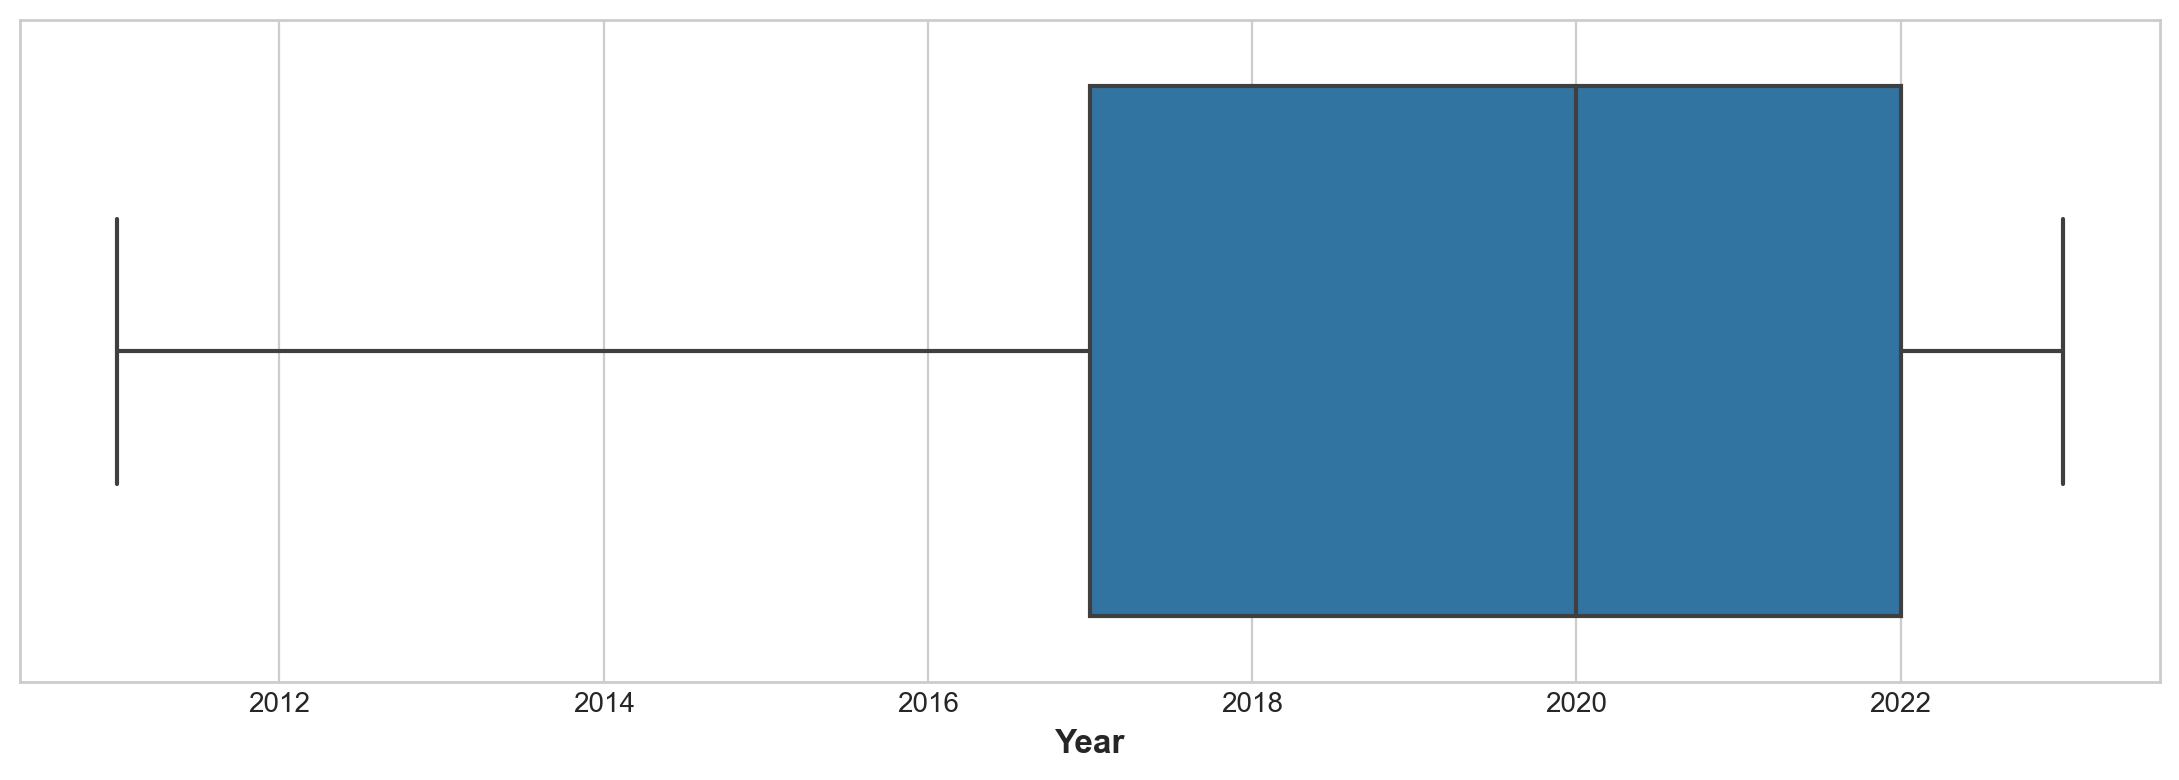

In [51]:
# which period contains most of university data?
sns.boxplot(data=university_df, x='Year')

<Axes: xlabel='Year'>

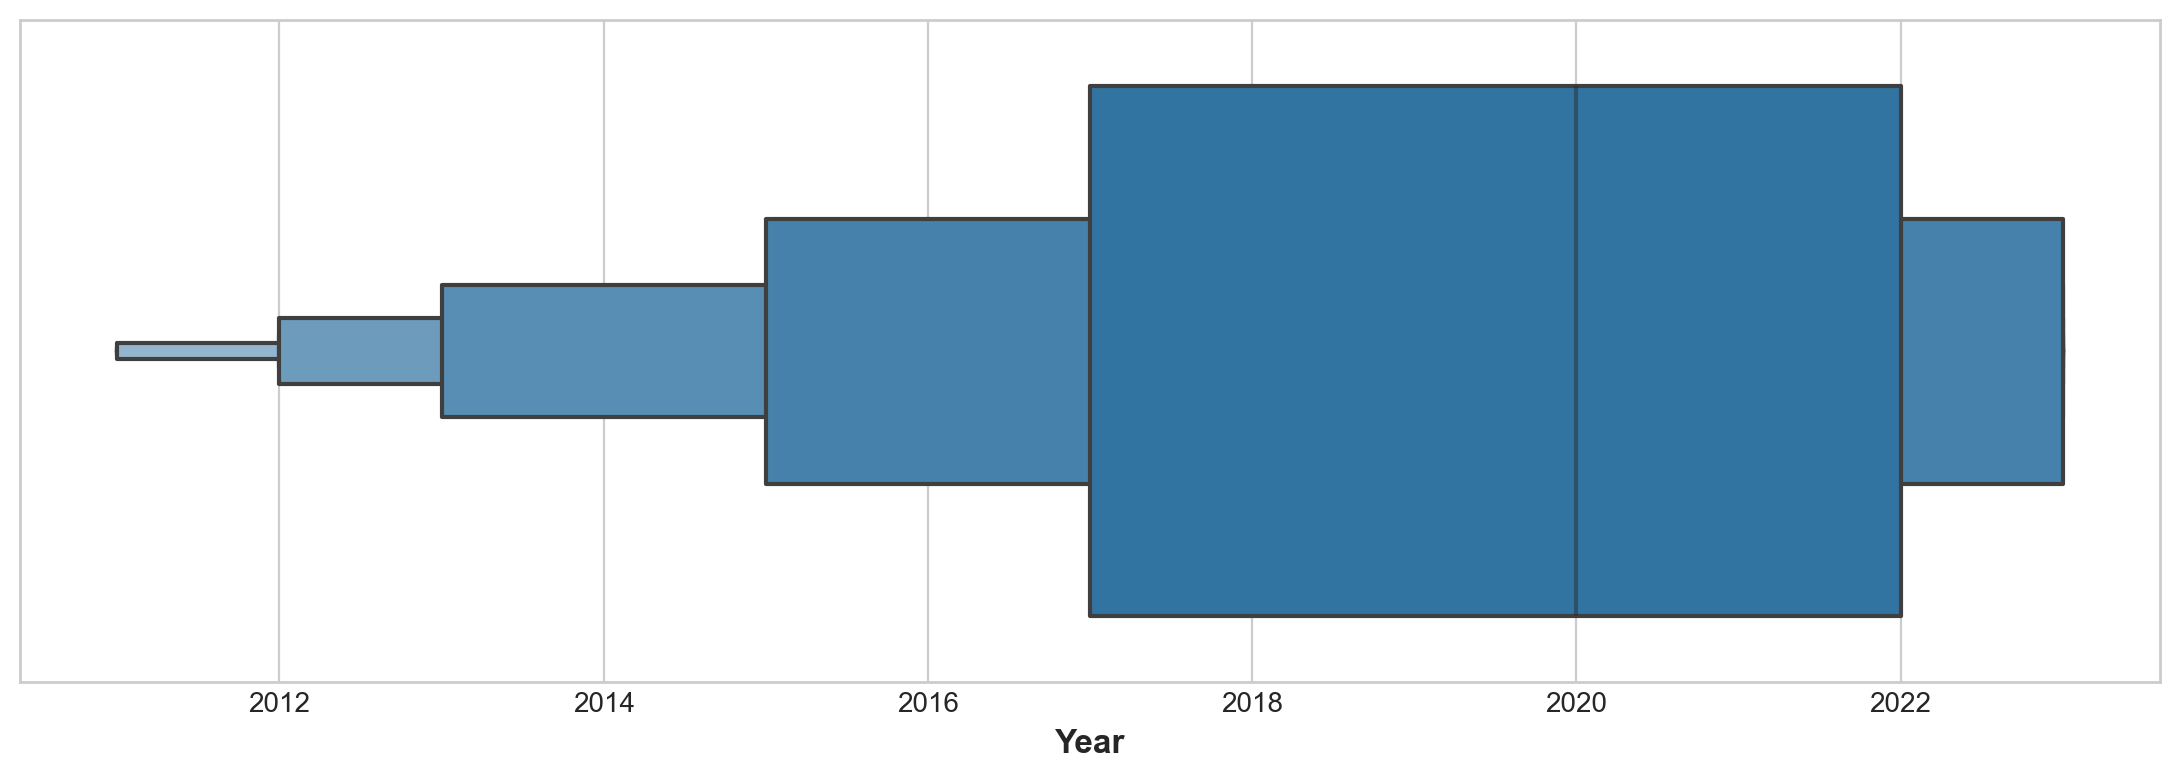

In [52]:
sns.boxenplot(data=university_df, x='Year')

In [53]:
# university_df.describe()

In [54]:
# university_df.columns

In [56]:
# Review Score Variables
uni_cor = university_df[['overall_scores',
       'scores_teaching', 'scores_international_outlook',
       'scores_industry_income', 'scores_research', 'scores_citations']]
uni_cor.corr().style.background_gradient(cmap = 'summer')

In [57]:
# Riview Rank Variables
uni_cor = university_df[['overall_rank', 'teaching_rank', 'research_rank',
       'citations_rank', 'industry_income_rank', 'international_outlook_rank']]
uni_cor.corr().style.background_gradient(cmap = 'summer')

In [58]:
# Compare Overall Score vs Rank Variables
uni_cor = university_df[['overall_scores','overall_rank', 'teaching_rank', 'research_rank',
       'citations_rank', 'industry_income_rank', 'international_outlook_rank']]
uni_cor.corr().style.background_gradient(cmap = 'summer')

In [55]:
# RANKING ANALYSIS:

In [59]:
# Analyse the mean, median, and standard deviation of the score variable

In [57]:
university_df[['name','overall_scores',
       'scores_teaching', 'scores_international_outlook',
       'scores_industry_income', 'scores_research', 'scores_citations']].describe()

overall_scores  scores_teaching  scores_research  scores_citations
count    11527.000000     12329.000000     12329.000000      12329.000000
mean        35.484601        30.214081        26.446387         51.064717
std         19.740694        15.321563        19.043454         27.498073
min          0.000000         8.200000         0.800000          0.700000
25%         18.500000        19.200000        12.300000         26.400000
50%         33.250000        25.400000        20.200000         50.900000
75%         48.450000        36.400000        34.100000         74.400000
max         96.400000        99.700000        99.700000        100.000000

In [60]:
# analysig scores
score_df = university_df[['overall_scores',
       'scores_teaching', 'scores_international_outlook',
       'scores_industry_income', 'scores_research', 'scores_citations']] 
      

<Axes: >

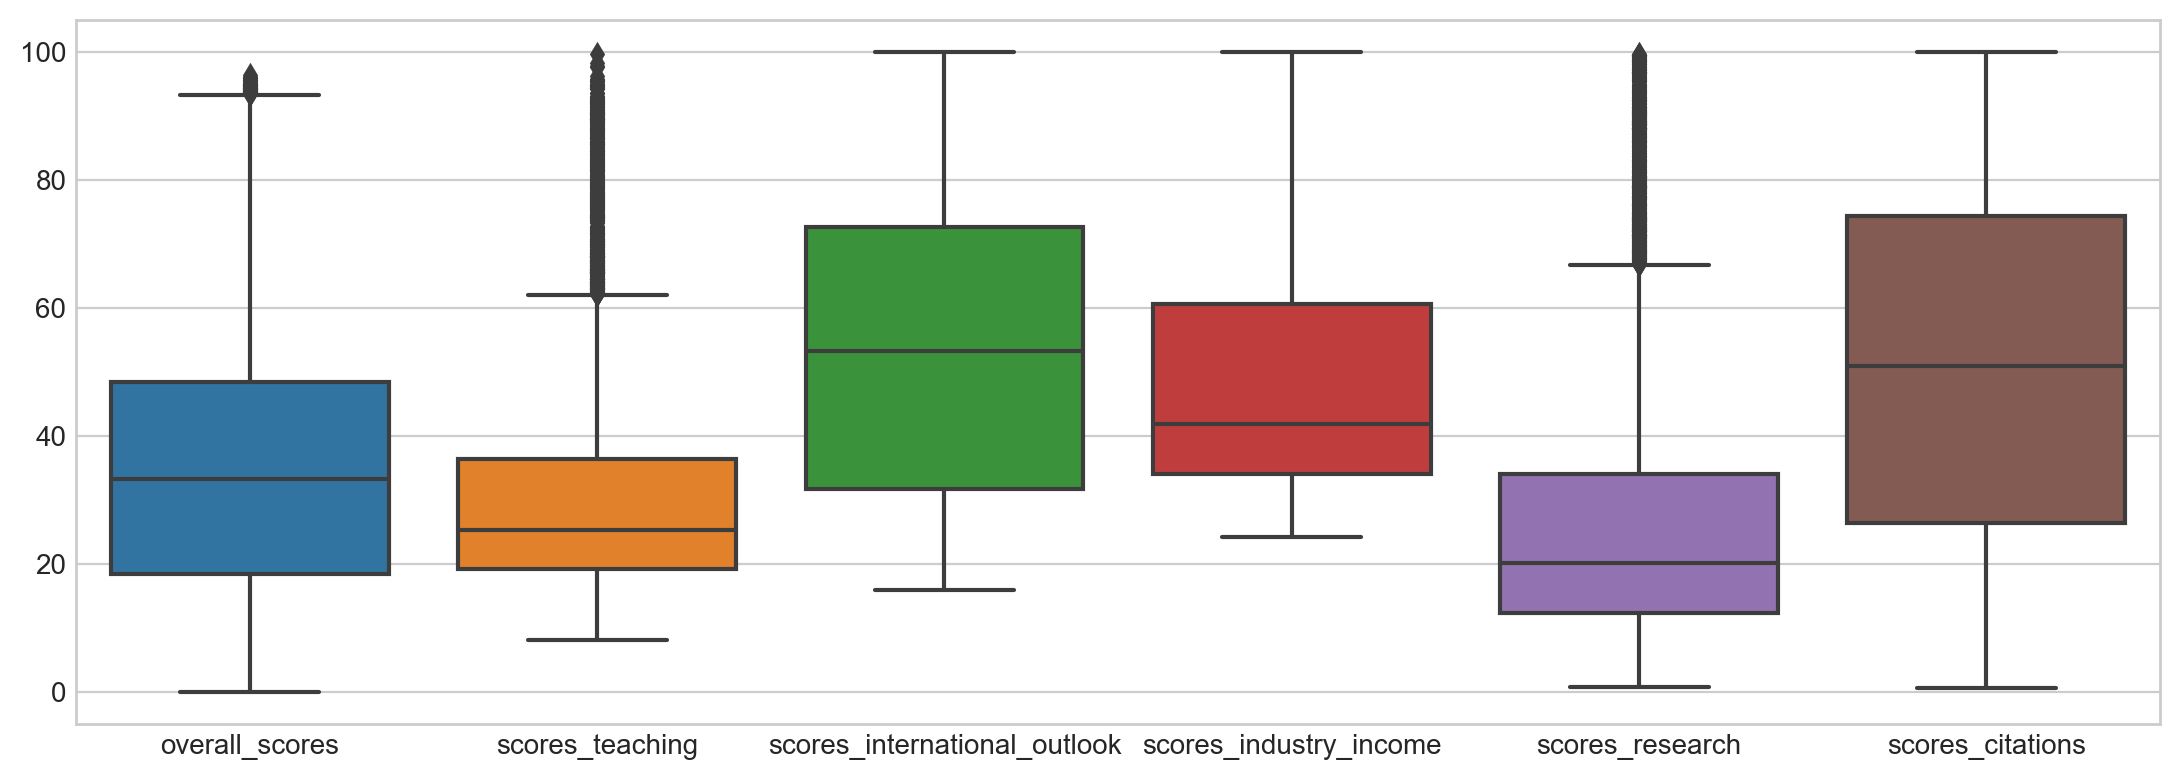

In [61]:
sns.boxplot(score_df)

<Axes: >

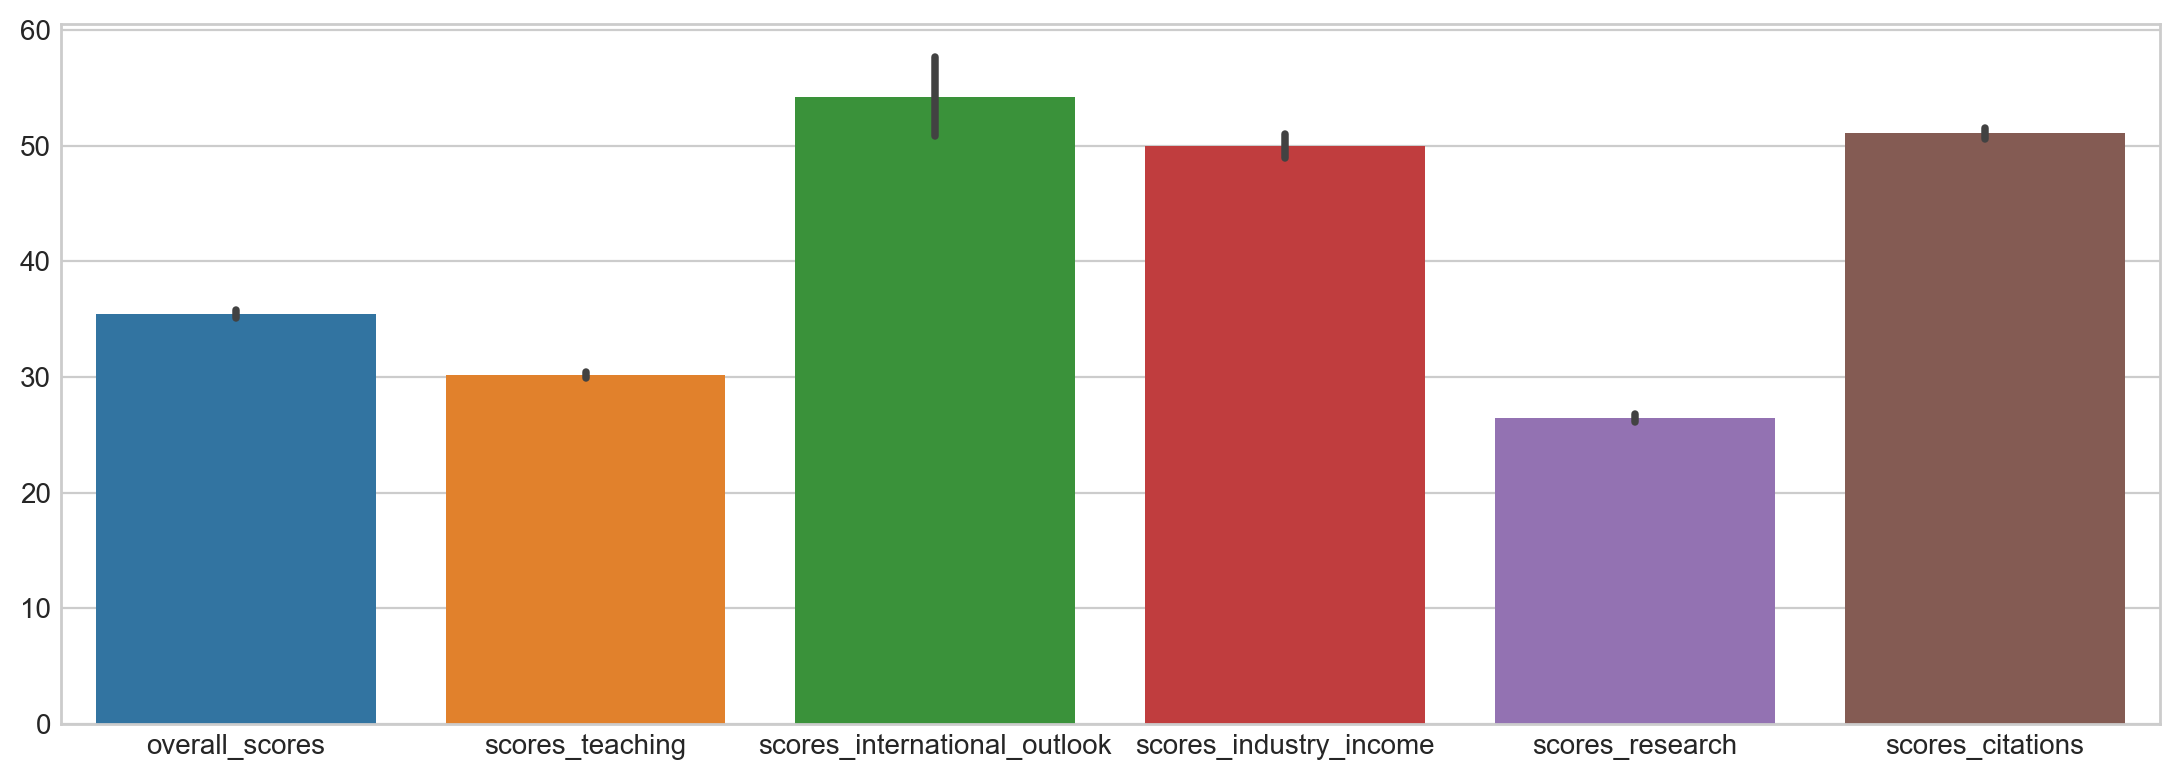

In [62]:
sns.barplot(score_df)

In [63]:
# The mean, median, and standard deviation of the rank variable

In [64]:
# analysig ranks
university_df[['overall_rank', 'teaching_rank', 'research_rank',
       'citations_rank', 'industry_income_rank', 'international_outlook_rank']].describe()

overall_rank  teaching_rank  research_rank  citations_rank  \
count  1.332500e+04   13325.000000   13325.000000    13325.000000   
mean   8.008573e+04     576.930507     576.930507      576.930507   
std    2.615863e+05     460.183347     460.183347      460.183347   
min    1.000000e+00       0.000000       0.000000        0.000000   
25%    1.050000e+03     180.000000     180.000000      180.000000   
50%    5.800000e+03     483.000000     483.000000      483.000000   
75%    1.069000e+04     914.000000     914.000000      914.000000   
max    1.000544e+06    1799.000000    1799.000000     1799.000000   

       industry_income_rank  international_outlook_rank  
count          13325.000000                13325.000000  
mean             576.930507                  576.930507  
std              460.183347                  460.183347  
min                0.000000                    0.000000  
25%              180.000000                  180.000000  
50%              483.000000                  483.000000  
75%              914.000000                  914.000000  
max             1799.000000                 1799.000000

In [65]:
# calculate the mean rank for each country.

In [65]:
country_rank = university_df.groupby('country')[['overall_rank', 'teaching_rank', 'research_rank',
       'citations_rank', 'industry_income_rank', 'international_outlook_rank']].mean()
country_rank.sort_values('overall_rank').head(10)

overall_rank  teaching_rank  research_rank  citations_rank  \
country                                                                   
Singapore      220.807692      64.192308      40.730769      185.192308   
Netherlands    694.825301     178.542169      97.493976      213.078313   
Hong Kong      840.644737     183.328947     162.618421      240.934211   
Belgium       1587.437500     301.406250     194.343750      315.614583   
Sweden        1648.057554     385.956835     241.115108      246.798561   
Denmark       1715.320513     421.230769     241.641026      248.833333   
Luxembourg    1931.625000     372.875000     275.500000      270.750000   
Australia     2262.619565     504.051630     310.461957      316.611413   
Norway        2456.120690     455.896552     439.241379      274.310345   
Iceland       2634.166667     971.333333     431.833333      164.722222   

             industry_income_rank  international_outlook_rank  
country                                                        
Singapore              100.423077                   23.961538  
Netherlands            140.451807                  155.156627  
Hong Kong              286.565789                   63.618421  
Belgium                174.656250                  218.604167  
Sweden                 369.453237                  271.208633  
Denmark                277.564103                  161.358974  
Luxembourg             442.875000                    2.375000  
Australia              385.934783                  123.097826  
Norway                 545.655172                  215.844828  
Iceland                451.944444                  293.833333

<Axes: >

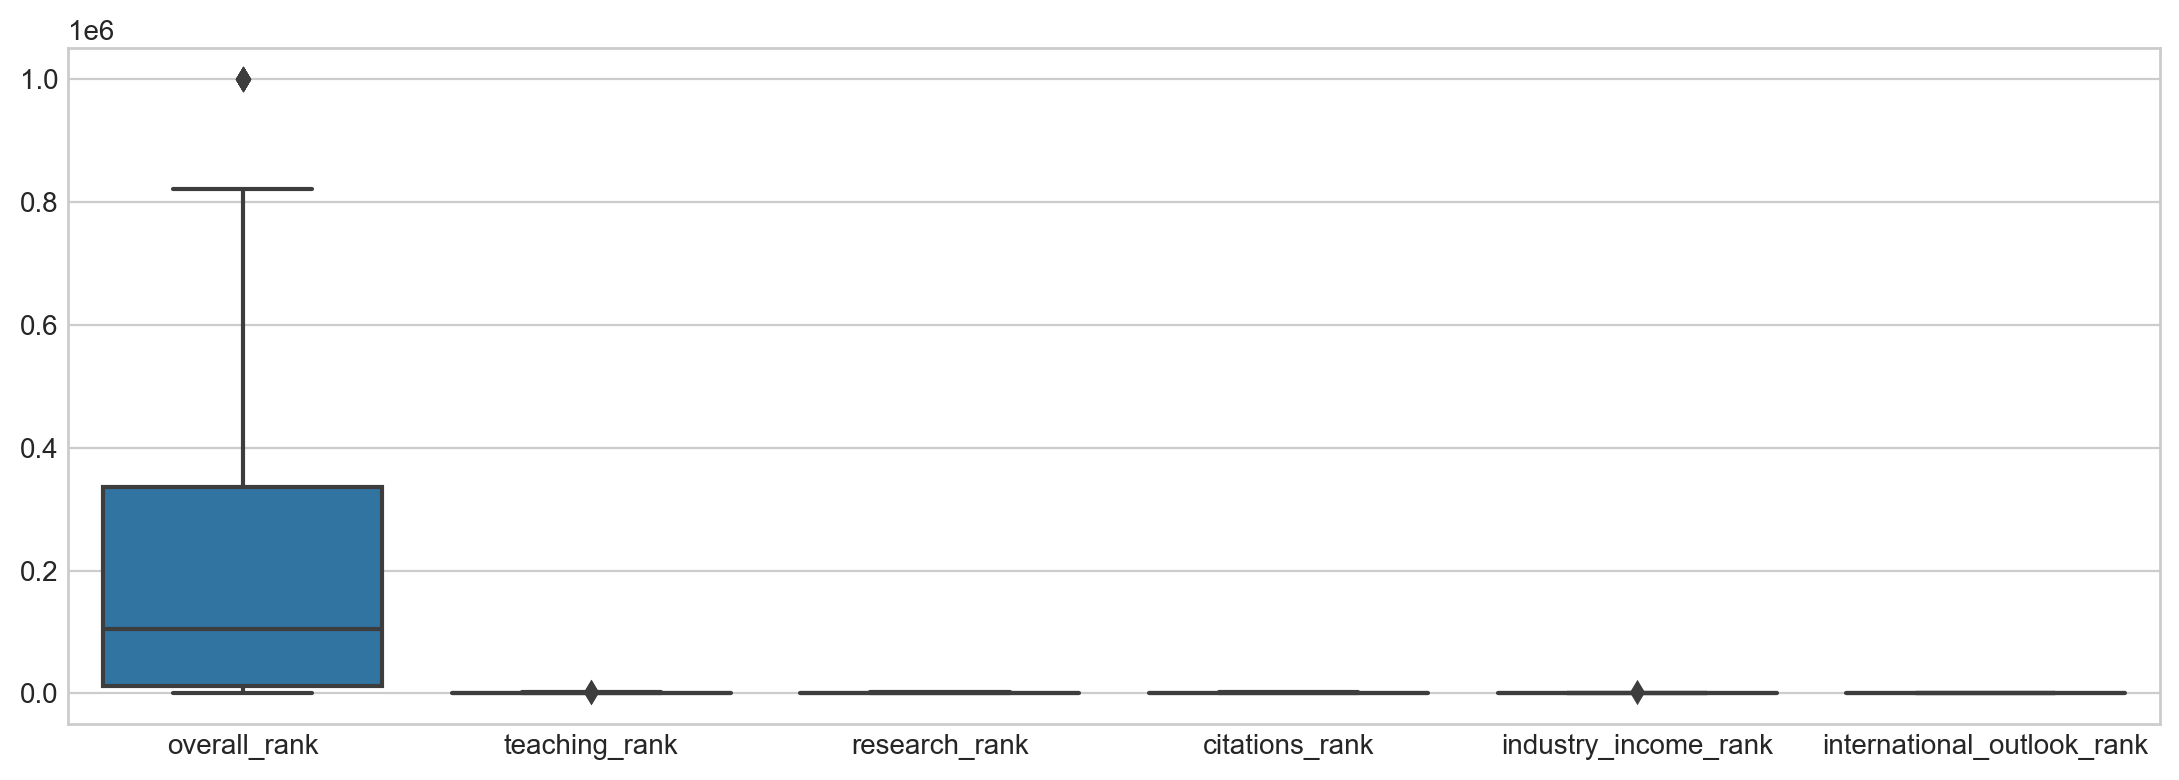

In [66]:
sns.boxplot(country_rank.sort_values('overall_rank'))

In [67]:
# check the outliers and remove them
country_rank.sort_values('overall_rank', ascending=False).head(20)

overall_rank  teaching_rank  research_rank  \
country                                                              
Kosovo                  1.000481e+06       0.000000       0.000000   
Bosnia and Herzegovina  1.000412e+06       0.000000       0.000000   
Turkmenistan            1.000391e+06       0.000000       0.000000   
Uzbekistan              1.000375e+06       0.000000       0.000000   
Albania                 1.000368e+06       0.000000       0.000000   
Cambodia                1.000338e+06       0.000000       0.000000   
Sudan                   1.000326e+06       0.000000       0.000000   
Uruguay                 1.000318e+06       0.000000       0.000000   
Paraguay                1.000307e+06       0.000000       0.000000   
Mongolia                1.000290e+06       0.000000       0.000000   
Malawi                  1.000275e+06       0.000000       0.000000   
Kyrgyzstan              1.000253e+06       0.000000       0.000000   
Libya                   1.000234e+06       0.000000       0.000000   
Armenia                 1.000178e+06       0.000000       0.000000   
Moldova                 1.000121e+06       0.000000       0.000000   
Somalia                 1.000062e+06       0.000000       0.000000   
Bahrain                 1.000038e+06       0.000000       0.000000   
Benin                   1.000007e+06       0.000000       0.000000   
Azerbaijan              8.208856e+05     272.272727     312.818182   
Palestine               8.191195e+05     311.636364     293.727273   

                        citations_rank  industry_income_rank  \
country                                                        
Kosovo                        0.000000              0.000000   
Bosnia and Herzegovina        0.000000              0.000000   
Turkmenistan                  0.000000              0.000000   
Uzbekistan                    0.000000              0.000000   
Albania                       0.000000              0.000000   
Cambodia                      0.000000              0.000000   
Sudan                         0.000000              0.000000   
Uruguay                       0.000000              0.000000   
Paraguay                      0.000000              0.000000   
Mongolia                      0.000000              0.000000   
Malawi                        0.000000              0.000000   
Kyrgyzstan                    0.000000              0.000000   
Libya                         0.000000              0.000000   
Armenia                       0.000000              0.000000   
Moldova                       0.000000              0.000000   
Somalia                       0.000000              0.000000   
Bahrain                       0.000000              0.000000   
Benin                         0.000000              0.000000   
Azerbaijan                  289.272727            283.636364   
Palestine                     3.363636            226.909091   

                        international_outlook_rank  
country                                             
Kosovo                                    0.000000  
Bosnia and Herzegovina                    0.000000  
Turkmenistan                              0.000000  
Uzbekistan                                0.000000  
Albania                                   0.000000  
Cambodia                                  0.000000  
Sudan                                     0.000000  
Uruguay                                   0.000000  
Paraguay                                  0.000000  
Mongolia                                  0.000000  
Malawi                                    0.000000  
Kyrgyzstan                                0.000000  
Libya                                     0.000000  
Armenia                                   0.000000  
Moldova                                   0.000000  
Somalia                                   0.000000  
Bahrain                                   0.000000  
Benin                                     0.000000  
Azerbaijan    

<Axes: >

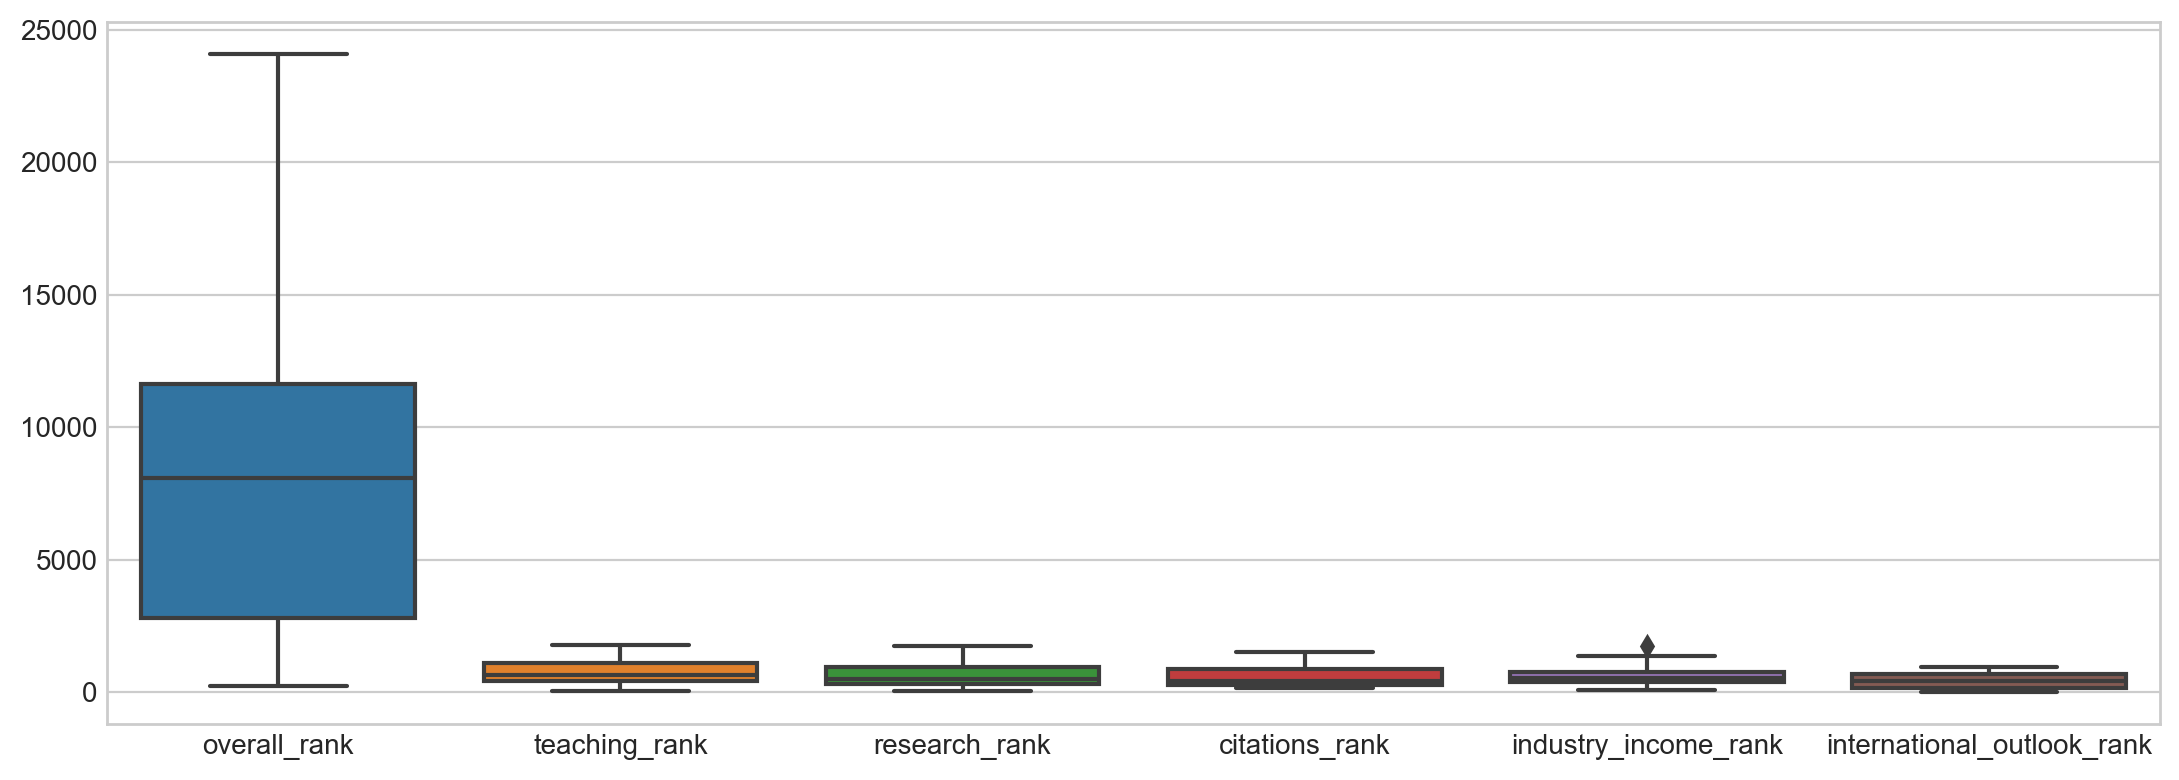

In [68]:
# Remove outliers
country_rank_Nout = country_rank[country_rank['overall_rank'] <= 25000]
sns.boxplot(country_rank_Nout.sort_values('overall_rank', ascending=False))

In [70]:
# top 10 universities based on the overall score and rank variables

In [70]:
grouped = university_df.groupby('name').mean().reset_index()
grouped.sort_values('overall_rank')[['name','overall_scores','overall_rank', 'teaching_rank', 'research_rank',
       'citations_rank', 'industry_income_rank', 'international_outlook_rank']].head(10)

<Axes: >

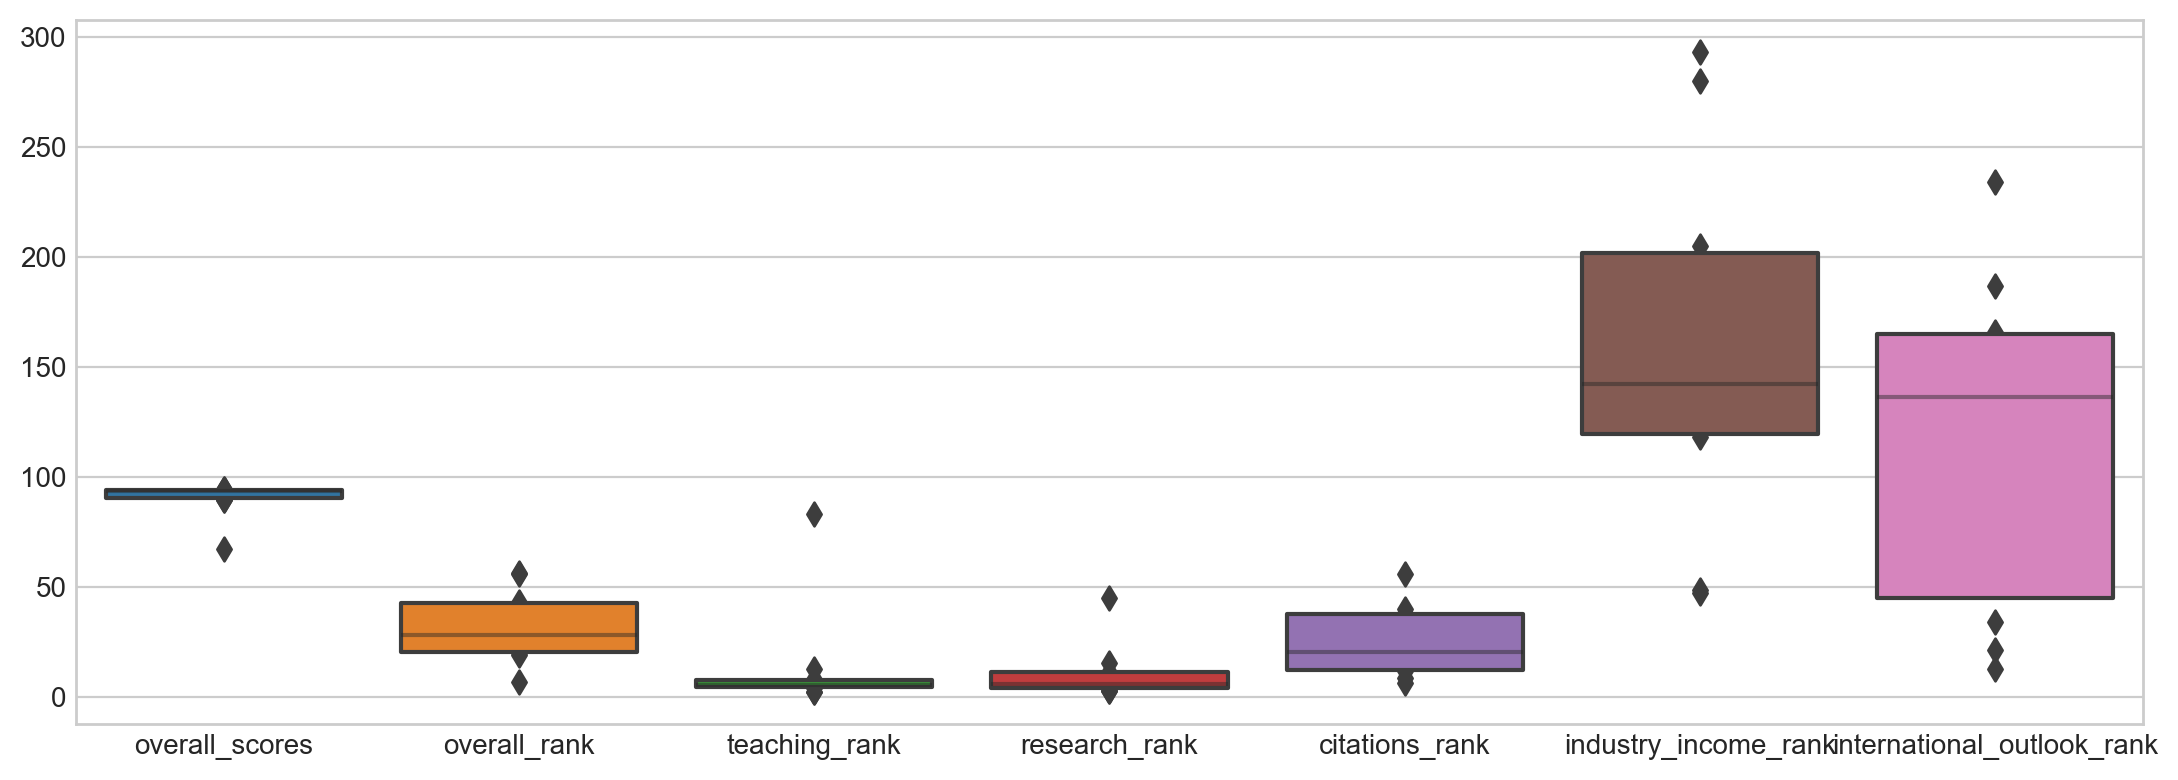

In [71]:
sns.boxenplot(grouped.sort_values('overall_rank')[['name', 'overall_scores','overall_rank', 'teaching_rank', 'research_rank',
       'citations_rank', 'industry_income_rank', 'international_outlook_rank']].head(10))

<Axes: >

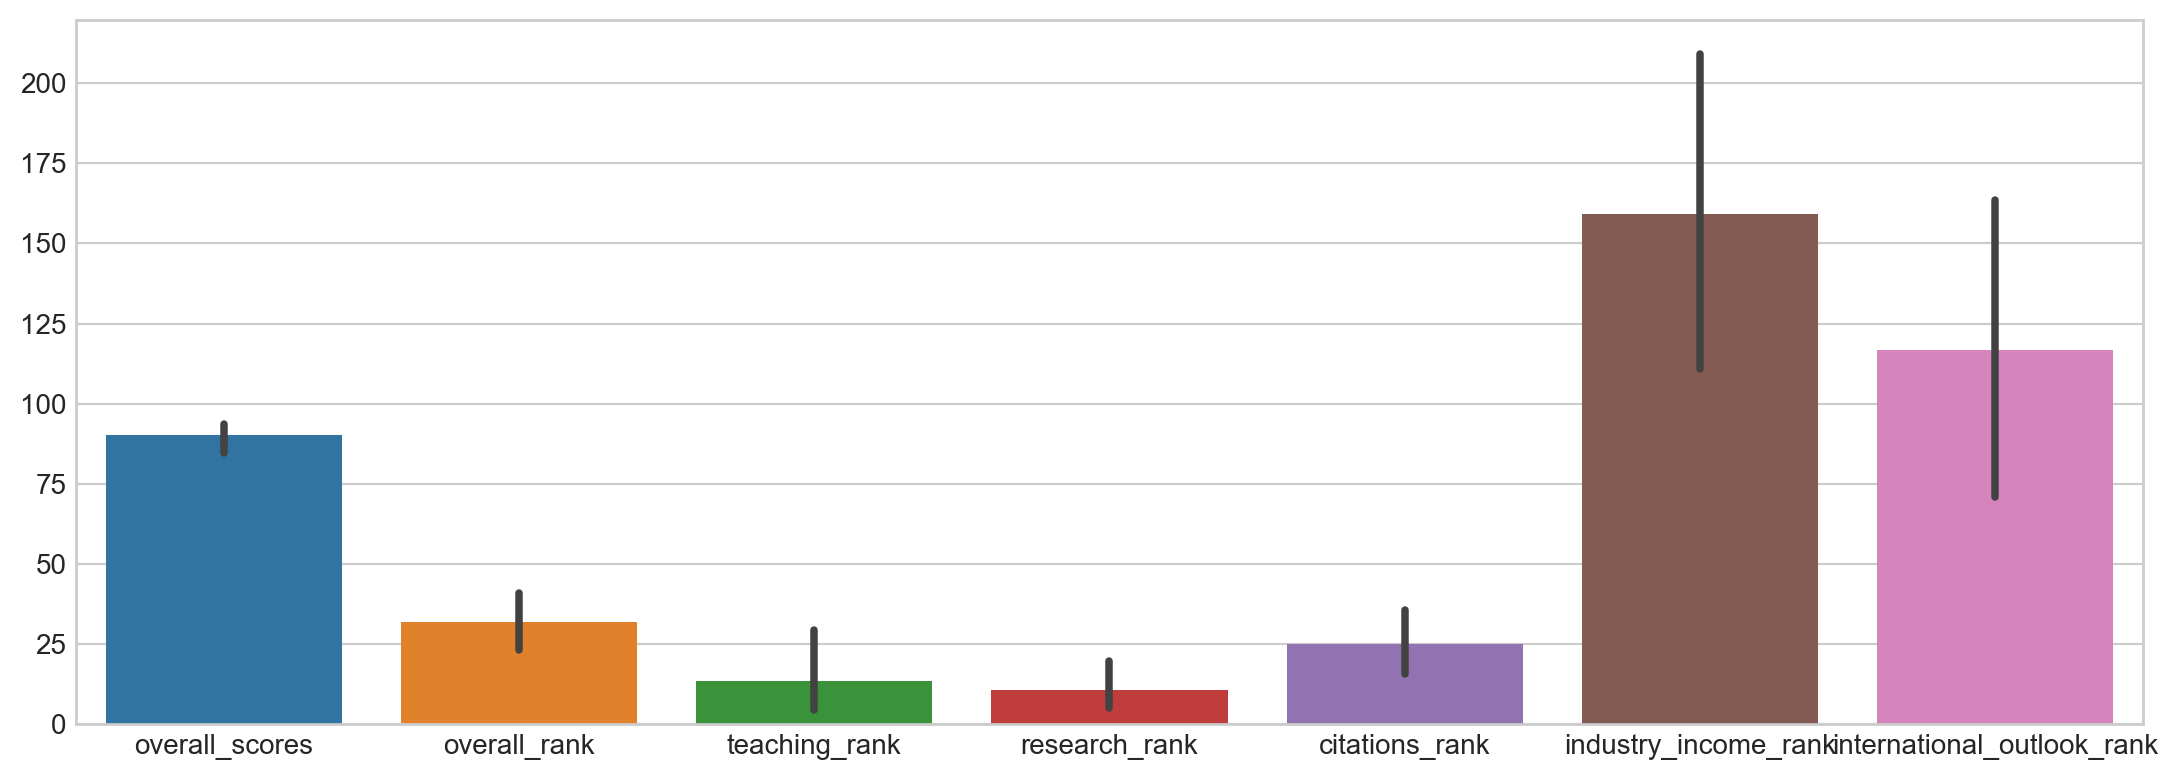

In [72]:
sns.barplot(grouped.sort_values('overall_rank')[['name','overall_scores','overall_rank', 'teaching_rank', 'research_rank',
       'citations_rank', 'industry_income_rank', 'international_outlook_rank']].head(10))

In [73]:
# Overall Score vs Rank Variables
uni_cor = university_df[['overall_scores','overall_rank', 'teaching_rank', 'research_rank',
       'citations_rank', 'industry_income_rank', 'international_outlook_rank']]
uni_cor.corr().style.background_gradient(cmap = 'summer')

In [75]:
cor_mat = uni_cor.corr()

# Set upper triangle to NaN
mask = np.zeros_like(cor_mat, dtype=np.bool)
mask[np.triu_indices_from(mask, k=1)] = True
cor_mat = cor_mat.mask(mask)
f, ax = plt.subplots(figsize=(7, 5))

# Plot correlation matrix as heatmap
sns.heatmap(cor_mat, cmap='coolwarm', annot=True, square=True)

In [76]:
# SUBJECT ANALYSIS:

In [77]:
# The number of universities that offer each subject

In [76]:
df_uni.head(5)

rank                                name  scores_overall_rank  \
0   1.0                  Harvard University                    1   
0   1.0  California Institute of Technology                    1   
0   1.0  California Institute of Technology                    1   
0   1.0  California Institute of Technology                    1   
0   1.0  California Institute of Technology                    1   

   scores_teaching  scores_international_outlook  scores_industry_income  \
0             99.7                          72.4                    34.5   
0             95.7                           NaN                    97.0   
0             96.3                           NaN                    95.6   
0             94.4                           NaN                    91.2   
0             92.2                           NaN                    89.1   

   scores_research  scores_citations       location  \
0             98.7              98.8  United States   
0             98.2              99.9  United States   
0             99.4              99.7  United States   
0             98.2              99.8  United States   
0             98.1              99.7  United States   

                                      aliases  ...  \
0                          Harvard University  ...   
0  California Institute of Technology caltech  ...   
0  California Institute of Technology caltech  ...   
0  California Institute of Technology caltech  ...   
0  California Institute of Technology caltech  ...   

   politics_&_international_studies_(incl_development_studies)  art  \
0                                                  1              1   
0                                                  1              1   
0                                                  1              1   
0                                                  1              1   
0                                                  1              1   

   veterinary_science accounting_&_finance  literature_&_linguistics  \
0                   0                    1                       1.0   
0                   0                    1                       1.0   
0                   0                    1                       1.0   
0                   0                    1                       1.0   
0                   0                    1                       1.0   

   performing_arts_&_design  environmental  earth_&_marine_sciences  \
0                       1.0            1.0                      1.0   
0                       1.0            1.0                      1.0   
0                       1.0            1.0                      1.0   
0                       1.0            1.0                      1.0   
0                       1.0            1.0                      1.0   

   philosophy_&_theology  philosophy  
0                    1.0         NaN  
0                    1.0         NaN  
0                    1.0         NaN  
0                    1.0         NaN  
0                    1.0         NaN  

[5 rows x 75 columns]

In [77]:
df_uni.columns

Index(['rank', 'name', 'scores_overall_rank', 'scores_teaching',
       'scores_international_outlook', 'scores_industry_income',
       'scores_research', 'scores_citations', 'location', 'aliases', 'closed',
       'unaccredited', 'Year', 'country', 'overall_rank', 'teaching_rank',
       'research_rank', 'citations_rank', 'industry_income_rank',
       'international_outlook_rank', 'num_students', 'student_staff_ratio',
       'intl_students_pct', 'female_male_ratio', 'pcnt_female', 'pcnt_male',
       'tot_female', 'tot_male', 'staff_population', 'overall_scores',
       'num_subjects', 'philosophy_&_theology', 'performing_arts_&_design',
       'business_&_management', 'education', 'law', 'environmental',
       'civil_engineering', 'architecture', 'economics_&_econometrics',
       'mechanical_&_aerospace_engineering', 'languages',
       'chemical_engineering', 'sociology', 'archaeology',
       'agriculture_&_forestry', 'philosophy', 'general_engineering',
       'medicine_&_den

In [78]:
subj_group = df_uni.groupby('name').mean().reset_index()
subj_group.head()

C:\Users\Kwame Afrifa\AppData\Local\Temp\ipykernel_6524\3971617070.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  subj_group = df_uni.groupby('name').mean().reset_index()


name          rank  \
0                   AECC University College  1.000005e+06   
1  AGH University of Science and Technology  8.803750e+03   
2                           AKFA University  1.000011e+06   
3                        Aalborg University  2.456167e+03   
4                          Aalto University  1.912250e+03   

   scores_overall_rank  scores_teaching  scores_international_outlook  \
0         1.000005e+06              NaN                           NaN   
1         8.123125e+03        18.012500                           NaN   
2         1.000011e+06              NaN                           NaN   
3         1.297167e+03        25.441667                           NaN   
4         1.227083e+03        35.158333                           NaN   

   scores_industry_income  scores_research  scores_citations  closed  \
0                     NaN              NaN               NaN     0.0   
1                     NaN        12.875000         27.937500     0.0   
2                     NaN              NaN               NaN     0.0   
3                  39.775        32.866667         67.183333     0.0   
4                  59.875        32.483333         64.825000     0.0   

   unaccredited  ...  \
0           0.0  ...   
1           0.0  ...   
2           0.0  ...   
3           0.0  ...   
4           0.0  ...   

   politics_&_international_studies_(incl_development_studies)  art  \
0                                                0.0            0.0   
1                                                1.0            1.0   
2                                                1.0            1.0   
3                                                1.0            1.0   
4                                                1.0            1.0   

   veterinary_science  accounting_&_finance  literature_&_linguistics  \
0            0.000000                   0.0                       NaN   
1            0.875000                   1.0                       1.0   
2            0.000000                   1.0                       1.0   
3            1.000000                   1.0                       1.0   
4            0.833333                   1.0                       1.0   

   performing_arts_&_design  environmental  earth_&_marine_sciences  \
0                       NaN            NaN                      NaN   
1                       1.0            1.0                      1.0   
2                       1.0            1.0                      1.0   
3                       1.0            1.0                      1.0   
4                       1.0            1.0                      1.0   

   philosophy_&_theology  philosophy  
0                    NaN         NaN  
1                    1.0         NaN  
2                    1.0         NaN  
3                    1.0         NaN  
4                    1.0         NaN  

[5 rows x 64 columns]

<Axes: xlabel='num_subjects', ylabel='name'>

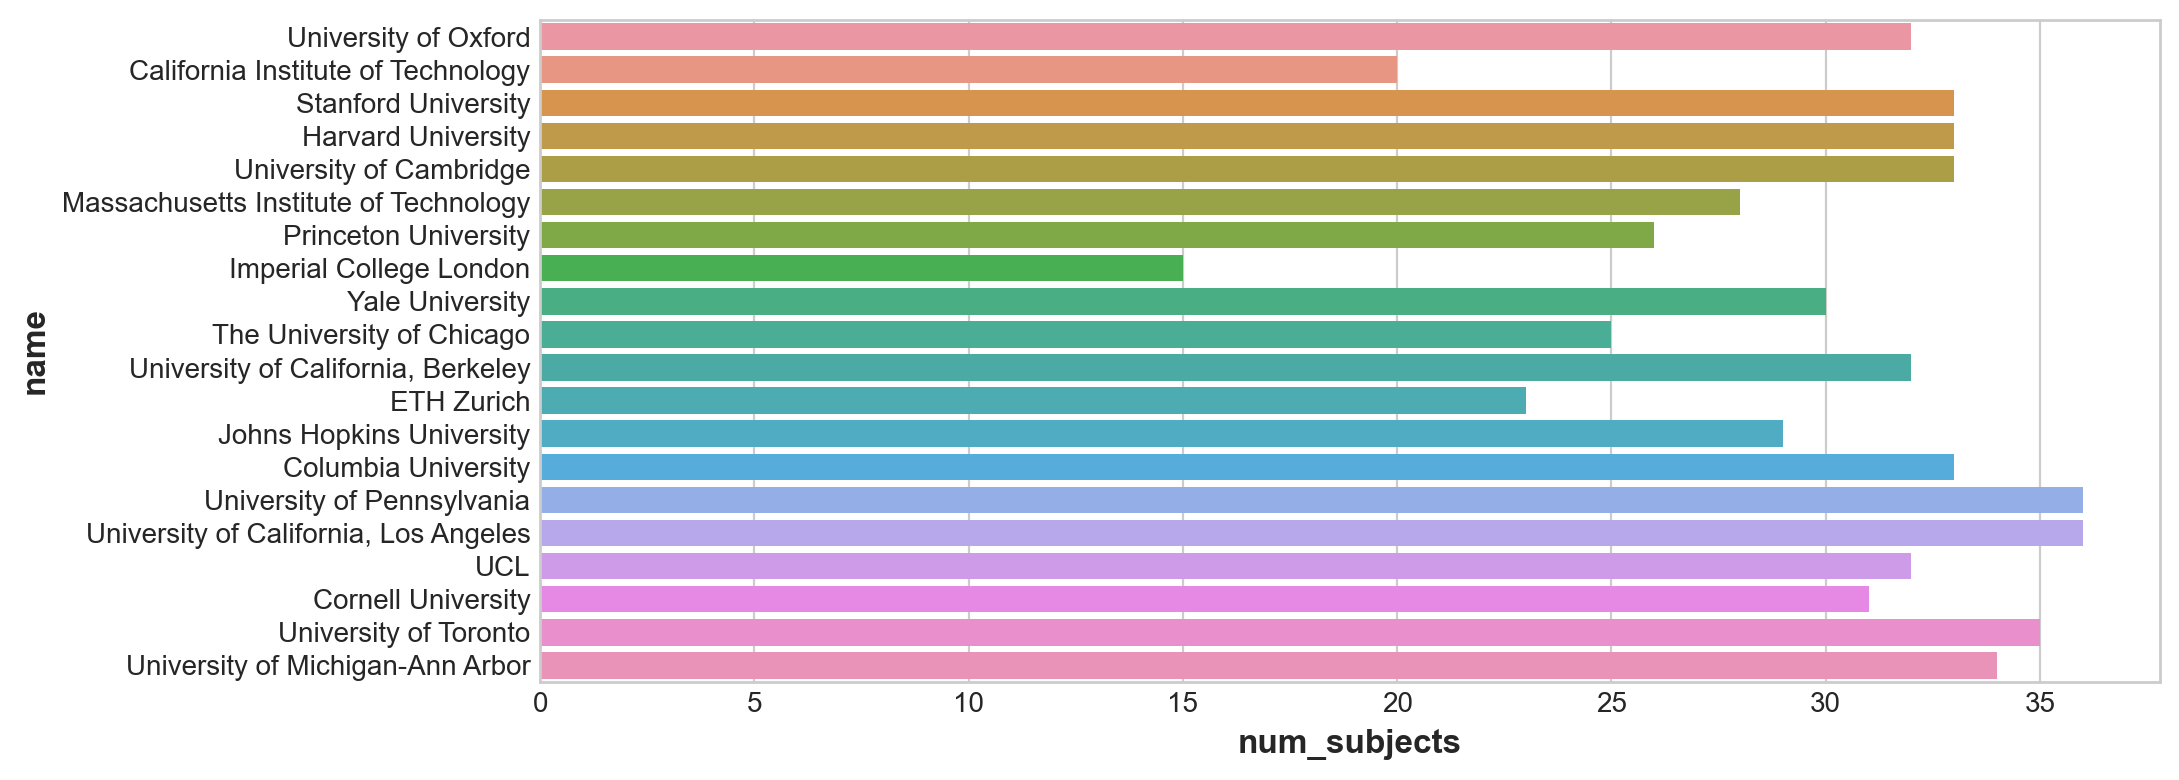

In [79]:
sns.barplot(subj_group.sort_values('rank')[['rank','name','num_subjects']].head(20), y='name', x='num_subjects')

In [81]:
subj_df = df_uni[['rank', 'name','veterinary_science', 'art', 'sociology', 'civil_engineering',
       'general_engineering', 'business_&_management', 'law',
       'chemical_engineering', 'geography',
       'electrical_&_electronic_engineering', 'chemistry', 'education',
       'physics_&_astronomy', 'psychology', 'history', 'computer_science',
       'languages', 'geology', 'economics_&_econometrics', 'archaeology',
       'communication_&_media_studies', 'agriculture_&_forestry',
       'sport_science', 'biological_sciences', 'architecture',
       'accounting_&_finance', 'data_science',
       'mechanical_&_aerospace_engineering',
       'politics_&_international_studies_(incl_development_studies)',
       'other_health', 'medicine_&_dentistry', 'mathematics_&_statistics']]



In [82]:
df_subj = subj_df.groupby('name').mean().reset_index().sort_values('rank').head(10)
df_subj.head()

name      rank  veterinary_science  art  \
2233                University of Oxford  2.230769            0.461538  1.0   
247   California Institute of Technology  2.461538            0.615385  1.0   
1547                 Stanford University  3.384615            1.000000  1.0   
584                   Harvard University  4.076923            0.923077  1.0   
1955             University of Cambridge  4.615385            1.000000  1.0   

      sociology  civil_engineering  general_engineering  \
2233        1.0                1.0                  1.0   
247         1.0                1.0                  1.0   
1547        1.0                1.0                  1.0   
584         1.0                1.0                  1.0   
1955        1.0                1.0                  1.0   

      business_&_management  law  chemical_engineering  ...  sport_science  \
2233                    1.0  1.0                   1.0  ...            0.0   
247                     1.0  1.0                   1.0  ...            0.0   
1547                    1.0  1.0                   1.0  ...            0.0   
584                     1.0  1.0                   1.0  ...            0.0   
1955                    1.0  1.0                   1.0  ...            0.0   

      biological_sciences  architecture  accounting_&_finance  data_science  \
2233                  1.0           1.0                   1.0           0.0   
247                   1.0           1.0                   1.0           0.0   
1547                  1.0           1.0                   1.0           0.0   
584                   1.0           1.0                   1.0           0.0   
1955                  1.0           1.0                   1.0           0.0   

      mechanical_&_aerospace_engineering  \
2233                                 1.0   
247                                  1.0   
1547                                 1.0   
584                                  1.0   
1955                                 1.0   

      politics_&_international_studies_(incl_development_studies)  \
2233                                                1.0             
247                                                 1.0             
1547                                                1.0             
584                                                 1.0             
1955                                                1.0             

      other_health  medicine_&_dentistry  mathematics_&_statistics  
2233           1.0                   1.0                       1.0  
247            1.0                   1.0                       1.0  
1547           1.0                   1.0                       1.0  
584            1.0                   1.0                       1.0  
1955           1.0                   1.0                       1.0  

[5 rows x 34 columns]

In [84]:
# STUDENTS ANALYSIS:

In [83]:
university_df.head()

rank                                   name  scores_overall_rank  \
0   1.0                     Harvard University                    1   
1   2.0     California Institute of Technology                    2   
2   3.0  Massachusetts Institute of Technology                    3   
3   4.0                    Stanford University                    4   
4   5.0                   Princeton University                    5   

   scores_teaching  scores_international_outlook  scores_industry_income  \
0             99.7                          72.4                    34.5   
1             97.7                          54.6                    83.7   
2             97.8                          82.3                    87.5   
3             98.3                          29.5                    64.3   
4             90.9                          70.3                     NaN   

   scores_research  scores_citations       location  \
0             98.7              98.8  United States   
1             98.0              99.9  United States   
2             91.4              99.9  United States   
3             98.1              99.2  United States   
4             95.4              99.9  United States   

                                      aliases  ... student_staff_ratio  \
0                          Harvard University  ...                 NaN   
1  California Institute of Technology caltech  ...                 NaN   
2       Massachusetts Institute of Technology  ...                 NaN   
3                         Stanford University  ...                 NaN   
4                        Princeton University  ...                 NaN   

   intl_students_pct  female_male_ratio  pcnt_female pcnt_male  tot_female  \
0                  0                NaN          NaN       NaN         NaN   
1                  0                NaN          NaN       NaN         NaN   
2                  0                NaN          NaN       NaN         NaN   
3                  0                NaN          NaN       NaN         NaN   
4                  0                NaN          NaN       NaN         NaN   

   tot_male  staff_population  overall_scores  num_subjects  
0       NaN               NaN            96.1            33  
1       NaN               NaN            96.0            20  
2       NaN               NaN            95.6            28  
3       NaN               NaN            94.3            33  
4       NaN               NaN            94.2            26  

[5 rows x 32 columns]

In [86]:
# Male and Female Population of each University

In [84]:
gender = university_df.groupby('name').mean().reset_index().sort_values('rank').dropna(axis=0).head(20)
gender.head()

C:\Users\Kwame Afrifa\AppData\Local\Temp\ipykernel_6524\1477713104.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  gender = university_df.groupby('name').mean().reset_index().sort_values('rank').dropna(axis=0).head(20)


name      rank  scores_overall_rank  \
2233                University of Oxford  2.230769             7.076923   
247   California Institute of Technology  2.461538            19.000000   
1547                 Stanford University  3.384615            20.000000   
584                   Harvard University  4.076923            26.692308   
1955             University of Cambridge  4.615385            21.923077   

      scores_teaching  scores_international_outlook  scores_industry_income  \
2233        89.592308                          77.2                   75.72   
247         93.946154                          54.6                   91.32   
1547        93.353846                          29.5                   62.98   
584         92.069231                          72.4                   38.98   
1955        90.361538                          77.7                   55.10   

      scores_research  scores_citations  closed  unaccredited  ...  \
2233        98.484615         97.623077     0.0           0.0  ...   
247         97.530769         99.023077     0.0           0.0  ...   
1547        97.038462         99.661538     0.0           0.0  ...   
584         98.553846         99.353846     0.0           0.0  ...   
1955        97.092308         96.261538     0.0           0.0  ...   

      international_outlook_rank  num_students  student_staff_ratio  \
2233                   21.153846      20448.75              11.0375   
247                   186.769231       2229.50               6.4750   
1547                  165.923077      15977.25               7.4375   
584                   151.538462      20813.50               9.1625   
1955                   34.000000      19096.25              11.1500   

      pcnt_female  pcnt_male   tot_female     tot_male  staff_population  \
2233       46.375     53.625   9484.88125  10963.86875       2256.407500   
247        33.875     66.125    755.51125   1473.98875        144.347625   
1547       43.500     56.500   6953.43375   9023.81625       1187.848625   
584        49.200     50.800  10447.45200  10780.54800       1908.834750   
1955       46.250     53.750   8835.80000  10260.45000       2129.388750   

      overall_scores  num_subjects  
2233       94.476923          32.0  
247        94.630769          20.0  
1547       94.069231          33.0  
584        93.730769          33.0  
1955       93.284615          33.0  

[5 rows x 26 columns]

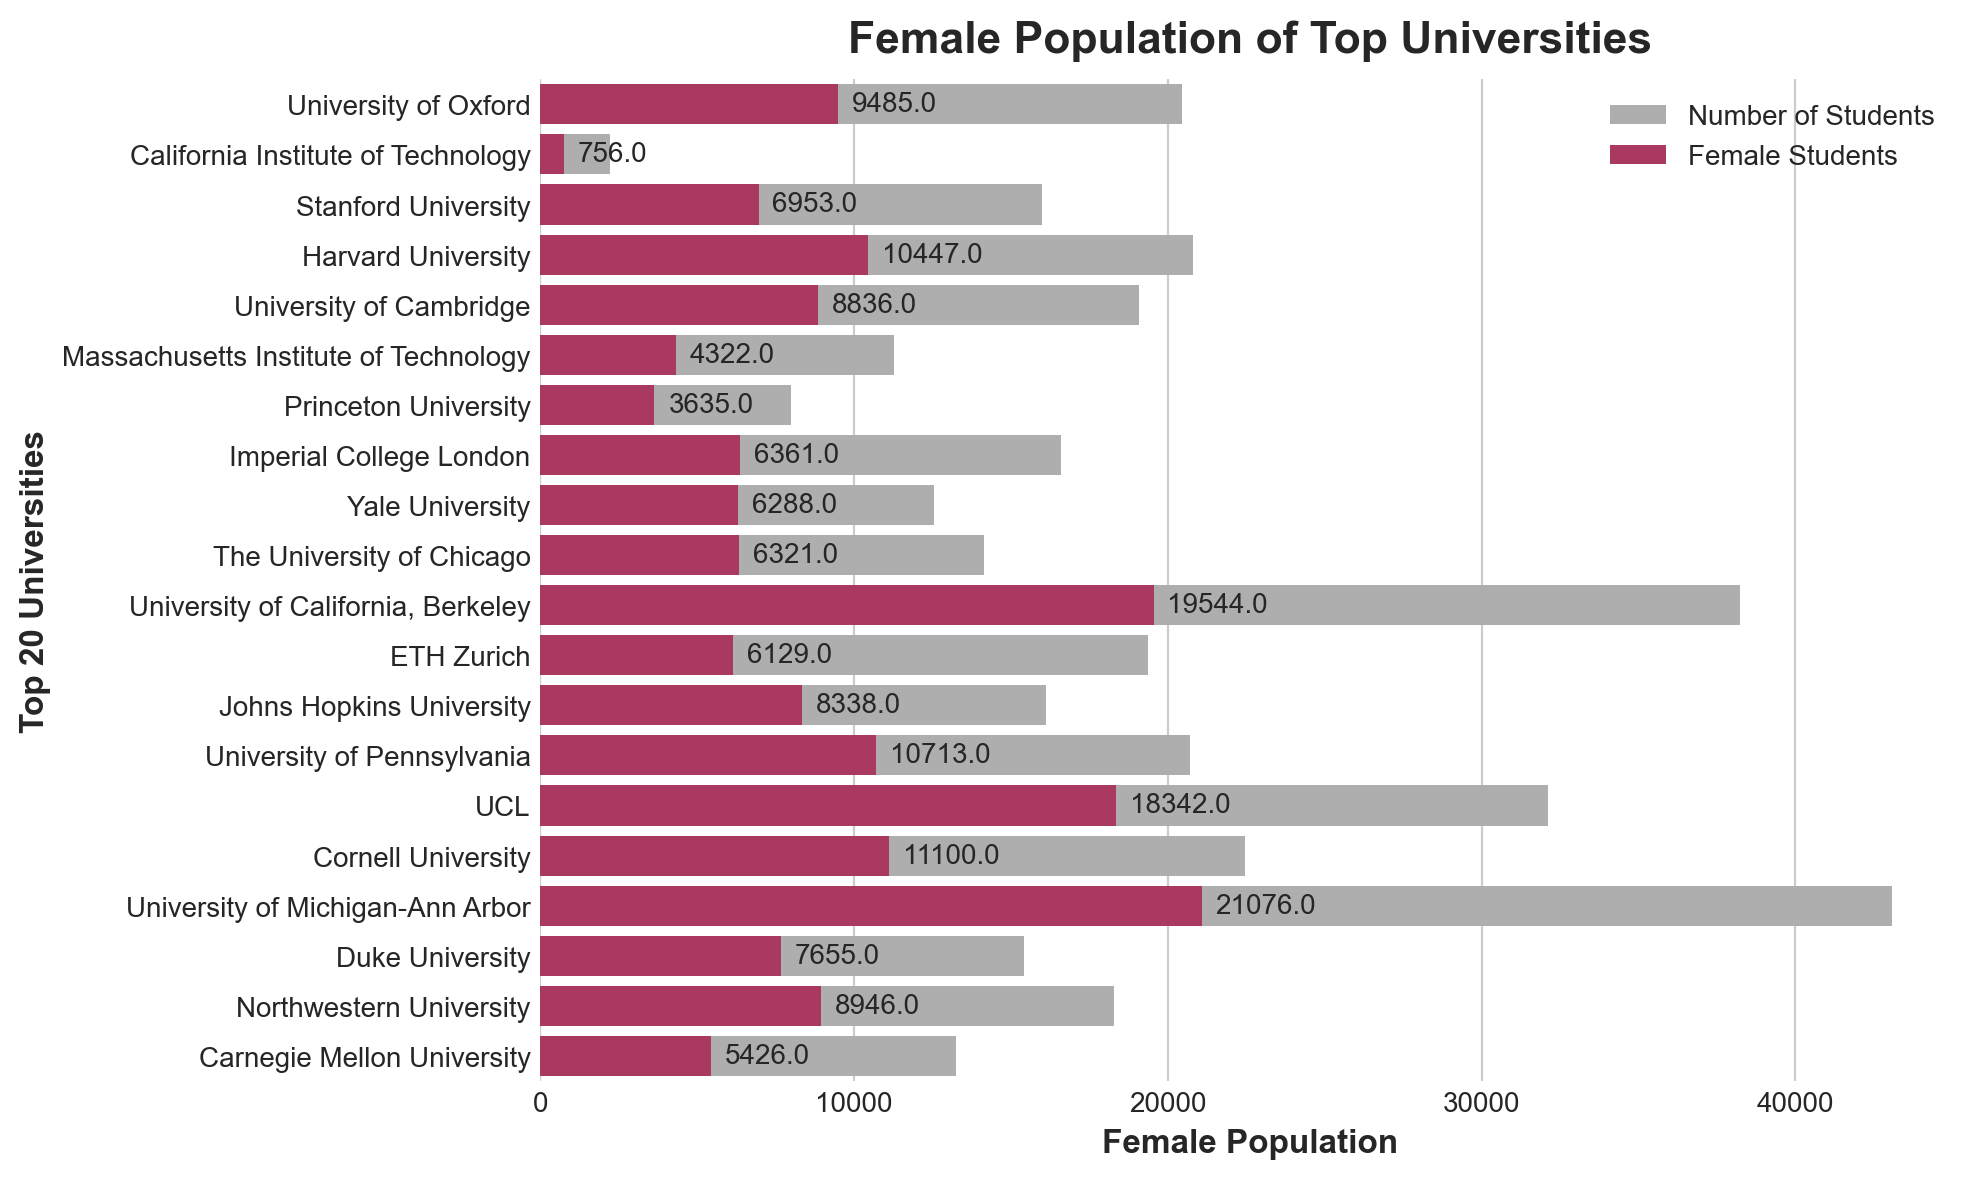

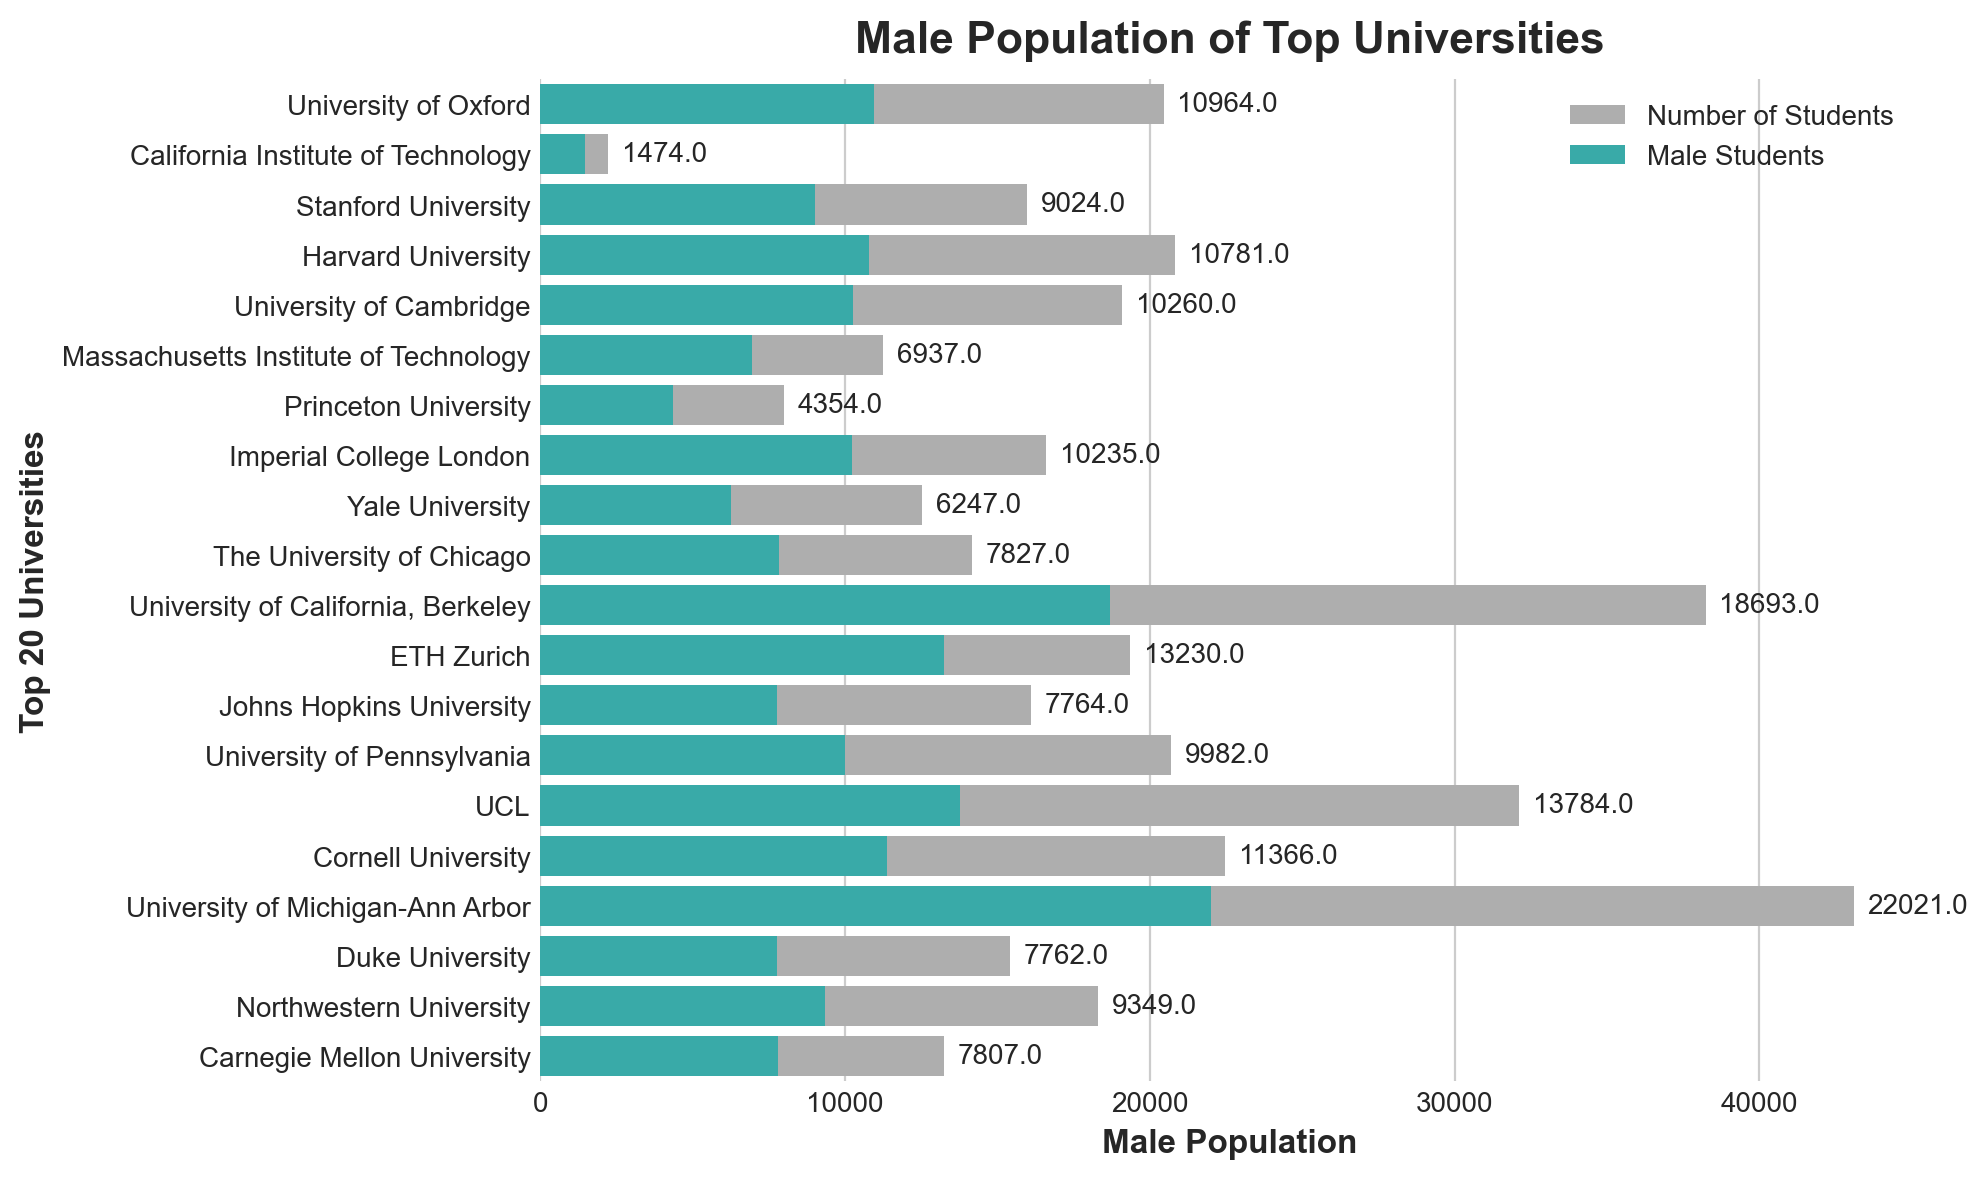

In [85]:
# Female Population

fig, ax = plt.subplots(1,1, figsize=(10,6))
sns.barplot(gender, y='name', x='num_students', ax=ax, color='#AEAEAE', label='Number of Students')
ax.set_ylabel('Rank')

sns.barplot(gender, y='name', x='tot_female', ax=ax, color='#bd265d', label='Female Students')
ax.set_ylabel('Rank')

ax.bar_label(ax.containers[1], labels=round(gender.tot_female,0), label_type='edge', padding=5)

sns.despine(left=True, bottom=True)

plt.title('Female Population of Top Universities')
plt.xlabel('Female Population')
plt.ylabel('Top 20 Universities')
plt.legend()
plt.show()

# Male Population

fig, ax = plt.subplots(1,1, figsize=(10,6))
sns.barplot(gender, y='name', x='num_students', ax=ax, color='#AEAEAE', label='Number of Students')
ax.set_ylabel('Rank')

sns.barplot(gender, y='name', x='tot_male', ax=ax, color='#26bdba', label='Male Students')
ax.set_ylabel('Rank')

ax.bar_label(ax.containers[0], labels=round(gender.tot_male,0), label_type='edge', padding=5)
sns.despine(left=True, bottom=True)

plt.title('Male Population of Top Universities')
plt.xlabel('Male Population')
plt.ylabel('Top 20 Universities')
plt.legend()
plt.show()

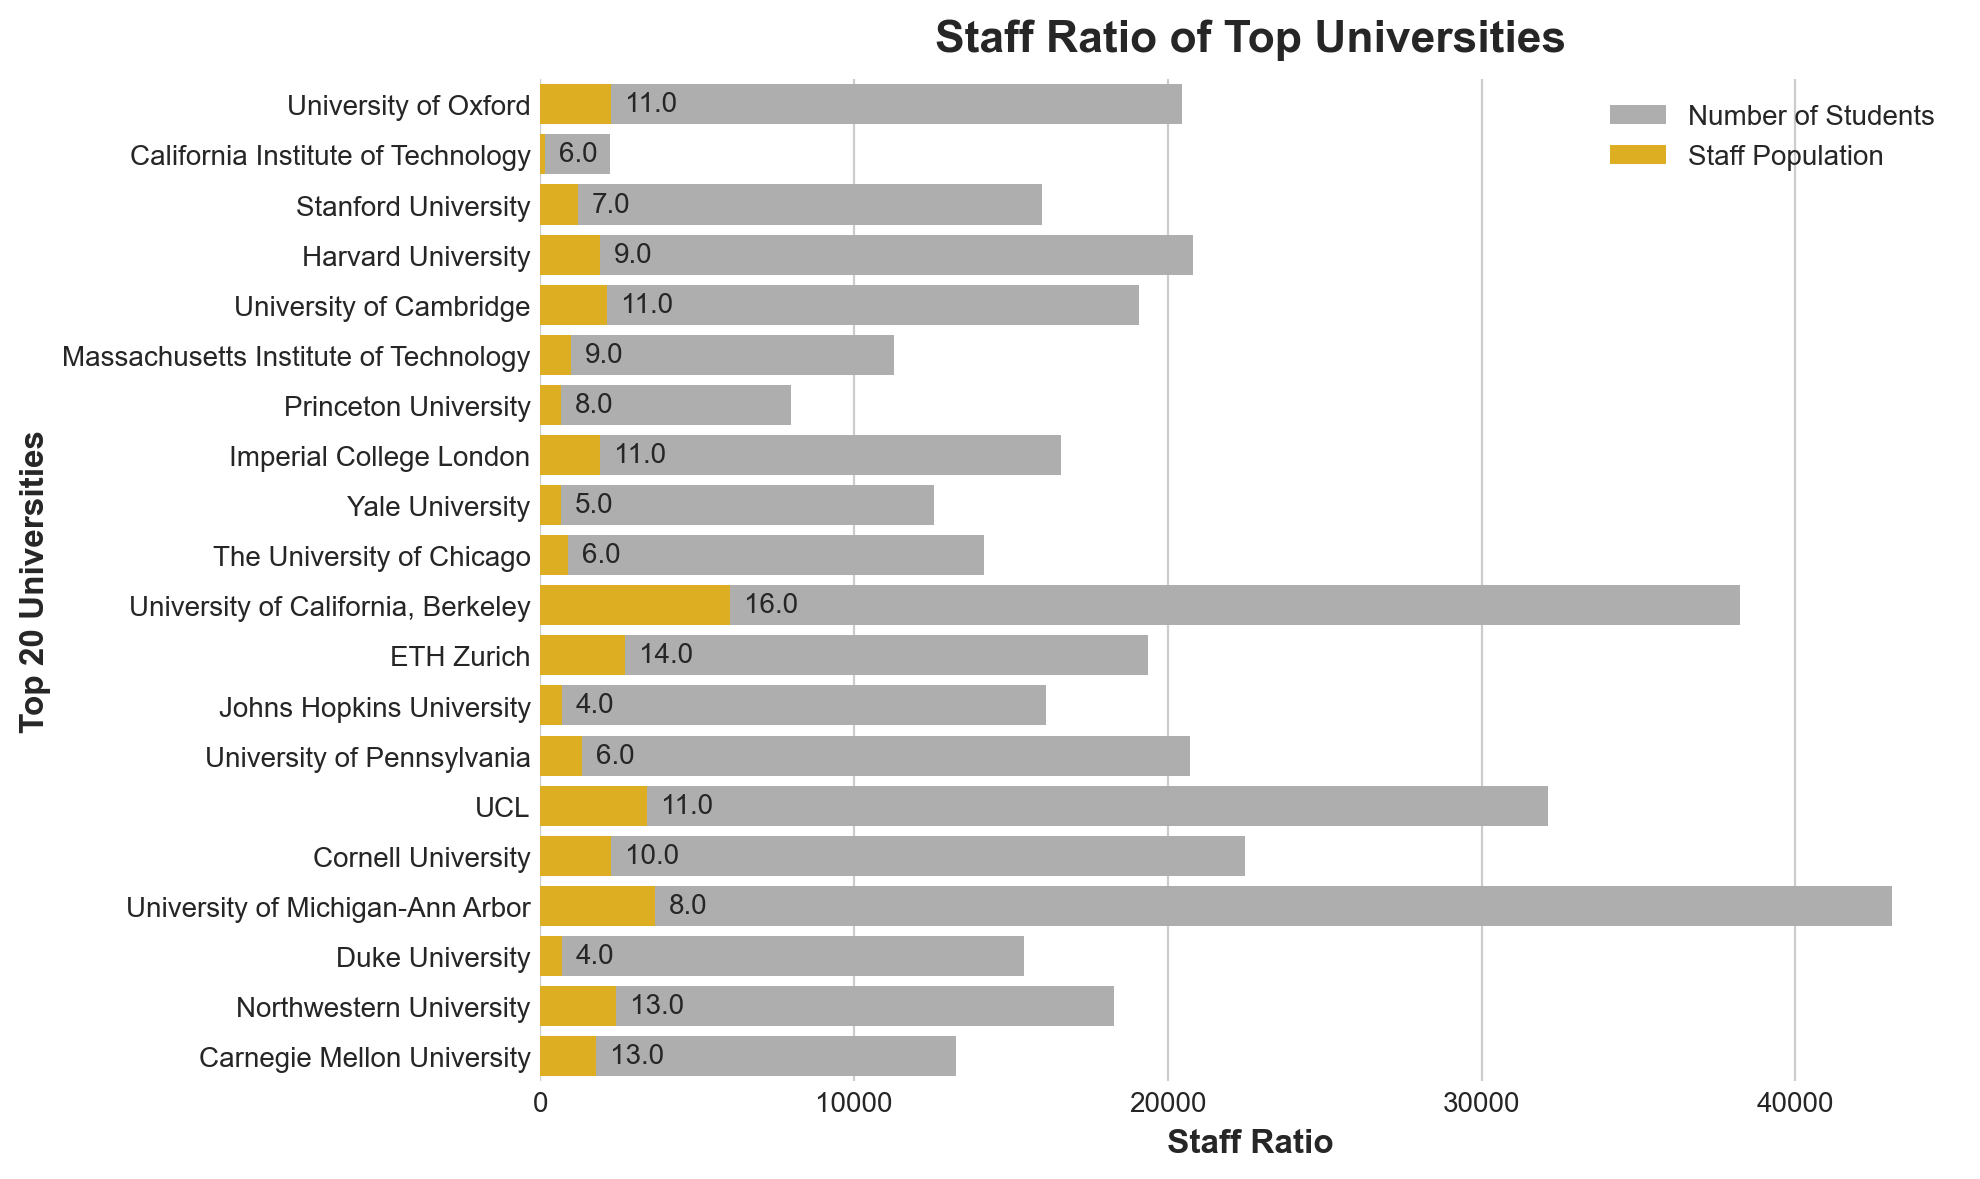

In [86]:
# Staff Ratio
fig, ax = plt.subplots(1,1, figsize=(10,6))
sns.barplot(gender, y='name', x='num_students', ax=ax, color='#AEAEAE', label='Number of Students')
ax.set_ylabel('Rank')

sns.barplot(gender, y='name', x='staff_population', ax=ax, color='#fcbe03', label='Staff Population')
ax.set_ylabel('Rank')

ax.bar_label(ax.containers[1], labels=round(gender.student_staff_ratio,0), label_type='edge', padding=5)
# ax.bar_label(ax.containers[0], labels=round(fe_me.tot_female,0), padding=3)

sns.despine(left=True, bottom=True)

plt.title('Staff Ratio of Top Universities')
plt.xlabel('Staff Ratio')
plt.ylabel('Top 20 Universities')
plt.legend()
plt.show()

In [88]:
country_df = university_df.groupby('country').mean().reset_index().sort_values('rank').head(20)
country_df.head()

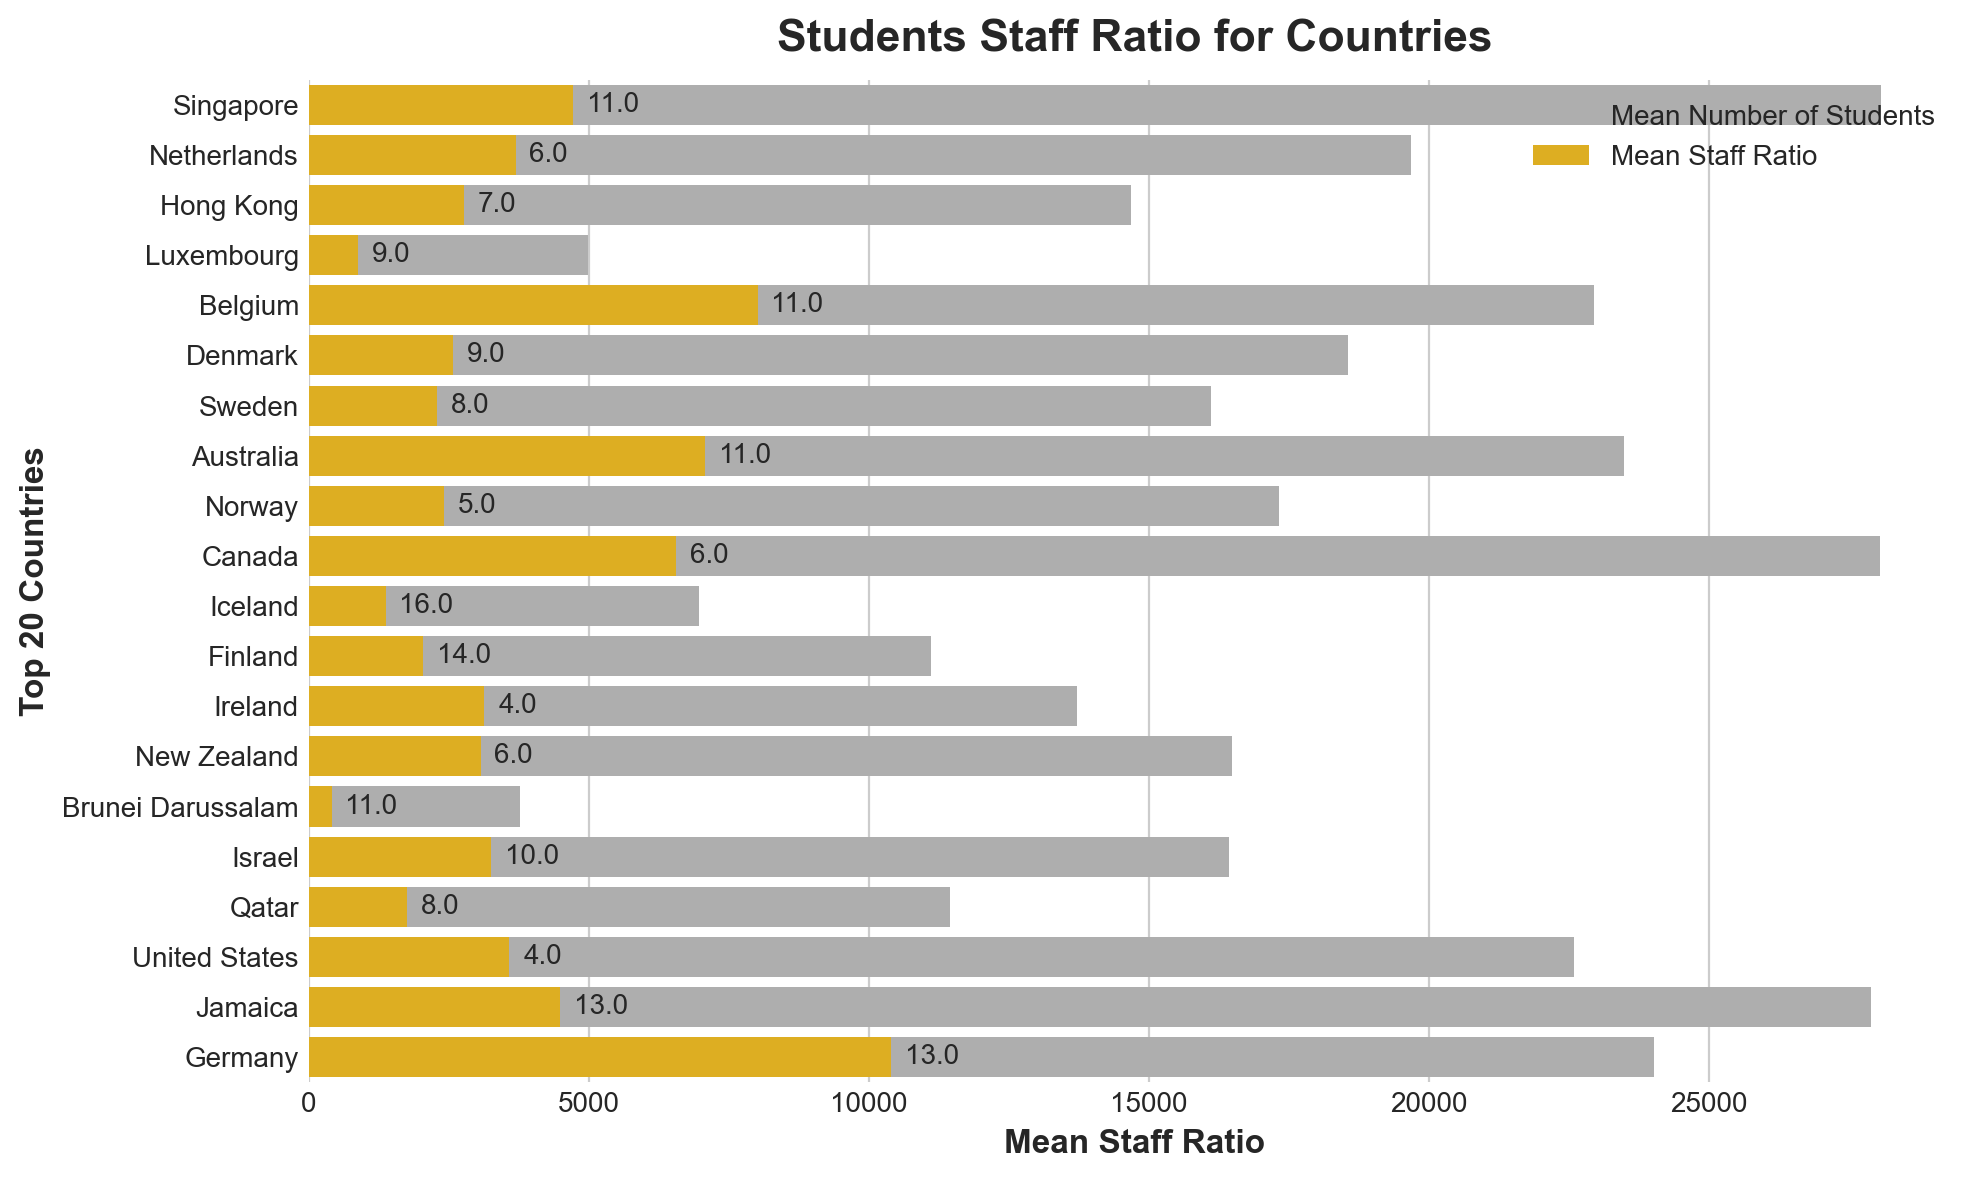

In [89]:
# Staff Ratio
fig, ax = plt.subplots(1,1, figsize=(10,6))
sns.barplot(country_df, y='country', x='num_students', ax=ax, color='#AEAEAE', label='Mean Number of Students')
ax.set_ylabel('Rank')

sns.barplot(country_df, y='country', x='staff_population', ax=ax, color='#fcbe03', label='Mean Staff Ratio')
ax.set_ylabel('Rank')

ax.bar_label(ax.containers[1], labels=round(gender.student_staff_ratio,0), label_type='edge', padding=5)

sns.despine(left=True, bottom=True)

plt.title('Students Staff Ratio for Countries')
plt.xlabel('Mean Staff Ratio')
plt.ylabel('Top 20 Countries')
plt.legend()
plt.show()

In [90]:
# Correlation between the rank variable and the student-to-staff ratio to see if there is any relationship

In [91]:
ratio_impact = country_df[['student_staff_ratio','overall_rank', 'teaching_rank', 'research_rank',
       'citations_rank', 'industry_income_rank', 'international_outlook_rank']]
ratio_impact.corr().style.background_gradient(cmap = 'summer')

In [93]:
cor_mat = ratio_impact.corr()

# Set upper triangle to NaN
mask = np.zeros_like(cor_mat, dtype=np.bool)
mask[np.triu_indices_from(mask, k=1)] = True
cor_mat = cor_mat.mask(mask)
f, ax = plt.subplots(figsize=(7, 5))

# Plot correlation matrix as heatmap
sns.heatmap(cor_mat, cmap='coolwarm', annot=True, square=True)

In [94]:
import math
import geopandas as gpd
import folium
from folium import Choropleth, Marker
from folium.plugins import HeatMap, MarkerCluster
from shapely.geometry import MultiPoint
from geopy.geocoders import Nominatim

In [97]:
geolocator = Nominatim(user_agent='kaggle_learn')
location = geolocator.geocode('Pyramid of khufu')

In [98]:
print(location.point)
print(location.address)

29 58m 44.976s N, 31 8m 3.17625s E
هرم خوفو, شارع ابو الهول السياحي, نزلة البطران, الجيزة, 12125, مصر


In [99]:
point = location.point
print(f'latitude: {point.latitude}')
print(f'longitude: {point.longitude}')

latitude: 29.97916
longitude: 31.134215625236113


In [100]:
def my_geocoder(row):
    try:
        point = geolocator.geocode(row).point
        return pd.Series({'latitude': point.latitude, 'longitude': point.longitude})
    except:
        return None

university_df[['latitude','longitude']] = university_df.apply(lambda x: my_geocoder(x['name']), axis=1)

print("{}% of address were geocoded!".format((1 - sum(np.isnan(university_df['latitude']))/ len(university_df)) * 100))

83.52720450281426% of address were geocoded!


In [95]:
# Drop universities that were not successfully encoded
university_df = university_df.loc[~np.isnan(university_df['latitude'])]
university_df = gpd.GeoDataFrame(university_df, geometry=gpd.points_from_xy(university_df['longitude'],
                                                             university_df['latitude']))
university_df.crs = {'init':'epsg:4326'}
university_df.head()

In [102]:
university_df.columns

Index(['rank', 'name', 'scores_overall_rank', 'scores_teaching',
       'scores_international_outlook', 'scores_industry_income',
       'scores_research', 'scores_citations', 'location', 'aliases',
       'subjects_offered', 'closed', 'unaccredited', 'Year', 'country',
       'overall_rank', 'teaching_rank', 'research_rank', 'citations_rank',
       'industry_income_rank', 'international_outlook_rank', 'num_students',
       'student_staff_ratio', 'intl_students_pct', 'female_male_ratio',
       'pcnt_female', 'pcnt_male', 'tot_female', 'tot_male',
       'staff_population', 'overall_scores', 'num_subjects', 'latitude',
       'longitude', 'geometry'],
      dtype='object')

In [103]:
# university_df.info()

In [96]:
 university_df.to_file('world_universities/uni_locations.shp')

In [105]:
unique_data = university_df.drop_duplicates(subset=['name'], keep='first')[['name', 'geometry', 'latitude', 'longitude']]

In [106]:
unique_data.shape

(2023, 4)

In [107]:
unique_data[unique_data.name == 'Harvard University']

name                    geometry   latitude  longitude
0  Harvard University  POINT (-71.12678 42.36791)  42.367909 -71.126782

In [108]:
m = folium.Map(location=[42, -71], title='cartodbdark_matter', zoom_start=2)

for idx, row in unique_data.iterrows():
    Marker([row['latitude'], row['longitude']], popup=row['name'], tooltip=row['name']).add_to(m)
    
m

In [109]:
m_1 = folium.Map(location=[42,-71], zoom_start=5)

mc = MarkerCluster()
for idx, row in unique_data.iterrows():
    if not math.isnan(row['longitude']) and not math.isnan(row['latitude']): # removes null values from the plot
        mc.add_child(folium.Marker([row['latitude'], row['longitude']],popup=row['name'],tooltip=row['name']))
        
m_1.add_child(mc)

m_1

In [110]:
# university_df[university_df['country'] == 'Ghana'].head(50)